# Do not run the code below this cells all this is data processing and already saved as CSV. There is another marked section which specify which cells to run

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import seaborn as sns

Contains data realted to matches

In [20]:
df1 = pd.read_csv("match.csv") 

Contains data related to players

In [21]:
df2 = pd.read_csv("players.csv")

Merge so that we can compare which hero gives better performance

In [4]:
df = pd.merge(df1,df2,on='match_id')

Select only required colums

In [5]:
df = df[['match_id','radiant_win',
 'player_slot','account_id','hero_id']]

As in the match only one team wins we set the other team to False saying that the other team has lost

In [14]:
i = 5
while i < len(df):
    if (i)%10 == 0 :
        i += 5
        continue
    else:
        if df.loc[i]['radiant_win'] == True:
            df.at[i,'radiant_win'] = False
        else:
            df.at[i,'radiant_win'] = True
    i += 1

Create a new CSV for future use

In [127]:
'''df.to_csv('new_data.csv',index = None)'''

In [22]:
t = pd.read_csv("new_data.csv") 

We count the number of wins/losses for that hero and losses

In [24]:
w = {} #dict to store the wins
l = {} #dict to store the losses
for i in range(0,len(t)):
    #print(t.loc[i][4])
    x = t.loc[i][4]
    if t.loc[i][1] == True:
        if x not in w:
            w[x] = 1
        else:
            w[x] += 1
    else:
        if x not in l:
            l[x] = 1
        else:
            l[x] +=1

Format the dictionaries to create dataframes from the dictionary

In [28]:
dataw = {'hero_id': list(w.keys()), 'wins': list(w.values())}

In [29]:

datal = {'hero_id': list(l.keys()), 'losses': list(l.values())}

In [30]:
win = pd.DataFrame.from_dict(dataw)

In [31]:
loss = pd.DataFrame.from_dict(datal)

In [32]:
win['wins'].sum()

250000

In [33]:
loss['losses'].sum()

250000

Calculate the probabilities for each heroes for loss and win

In [34]:
win['win_probability'] = win['wins']/(win['wins'].sum()+loss['losses'].sum())

In [35]:
loss['loss_probability'] = loss['losses']/(win['wins'].sum()+loss['losses'].sum())

In [25]:
'''win.sort_values(by=['win_probability'], ascending=False)'''

"win.sort_values(by=['win_probability'], ascending=False)"

In [ ]:
'''loss.sort_values(by=['loss_probability'], ascending=False)'''

Created two new csv for future use

In [36]:
'''win.to_csv('hero_win_probability.csv',index = None)'''

In [37]:
'''loss.to_csv('hero_loss_probability.csv',index = None)'''

In [39]:
t = pd.read_csv("new_data.csv") 

We start creating our feature matrix

now we store all the combination of heroes which results in wins

In [40]:
a = []
b = []
i = 0
while i < len(t):
    if t.loc[i][1] == True:
        b.append(t.loc[i][4])
    else:
        if len(b) != 0:
            a.append(b)
        b = []
    if len(b) == 5:
        a.append(b)
        b = []
    i += 1
if len(b) != 0:
    a.append(b)

col contains all the unique id's for heroes

In [56]:
col = list(t['hero_id'].unique())

In [58]:
col.sort()

In [63]:
feat_mat_win = pd.DataFrame()
for i in col:
    feat_mat_win[i] = 0

In [65]:
c = [0]*111

Here we create our feature matrix to which stores 1 for each hero in the winning team and 0 for rest heroes

In [66]:
for i in range(0,len(a)):
    feat_mat_win.loc[i] = c
    for j in a[i]:
        feat_mat_win.loc[i][j] = 1

Store the feature matrix in CSV

In [68]:
'''feat_mat_win.to_csv('feature_matrix_win.csv',index = None)'''

In [4]:
df = pd.read_csv("feature_matrix_win.csv") 

Similary we computer for losses

In [69]:
a = []
b = []
i = 0
while i < len(t):
    if t.loc[i][1] == False:
        b.append(t.loc[i][4])
    else:
        if len(b) != 0:
            a.append(b)
        b = []
    if len(b) == 5:
        a.append(b)
        b = []
    i += 1
if len(b) != 0:
    a.append(b)

In [70]:
feat_mat_loss = pd.DataFrame()
for i in col:
    feat_mat_loss[i] = 0

In [71]:
for i in range(0,len(a)):
    feat_mat_loss.loc[i] = c
    for j in a[i]:
        feat_mat_loss.loc[i][j] = 1

Store the losses feature matrix in CSV

In [73]:
'''feat_mat_loss.to_csv('feature_matrix_loss.csv',index = None)'''

#                              RUN FROM HERE

In [2]:
dfW = pd.read_csv("feature_matrix_win.csv") 

In [3]:
dfL = pd.read_csv("feature_matrix_loss.csv") 

In [5]:
df


,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,109,110,111,112
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = dfW.head(10)

c:\users\amsbo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  if __name__ == '__main__':


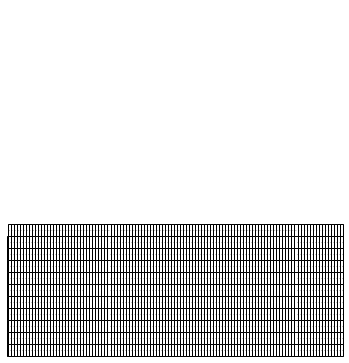

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')

# ---------------------------------------------------EDA --------------------------------------------------

## Calculating the count for win and losses for combination of 2 heroes

In [5]:
loss_count_2_heroes = {}
for i in dfL.keys():
    if int(i) == 0:
        continue
    td = dfL[(dfL[i]==1)]
    for j in dfL.keys():
        if int(j) == 0:
            continue
        if i==j:
            continue
        if(int(i) > int(j)):
            key = (int(j),int(i))
        else:
            key = (int(i),int(j))
        if key in loss_count_2_heroes:
            continue
        loss_count_2_heroes[key] = len(td[(td[i] == td[j])])

In [4]:
win_count_2_heroes = {}
for i in dfW.keys():
    if int(i) == 0:
        continue
    td = dfW[(dfW[i]==1)]
    for j in dfW.keys():
        if int(j) == 0:
            continue
        if i==j:
            continue
        if(int(i) > int(j)):
            key = (int(j),int(i))
        else:
            key = (int(i),int(j))
        if key in win_count_2_heroes:
            continue
        win_count_2_heroes[key] = len(td[(td[i] == td[j])])

In [6]:
win_count_2_heroes_sorted = sorted(win_count_2_heroes.items(), key=operator.itemgetter(1),reverse=True) #gives a sorted dict for easy
loss_count_2_heroes_sorted = sorted(loss_count_2_heroes.items(), key=operator.itemgetter(1),reverse=True) #gives a sorted dict for easy

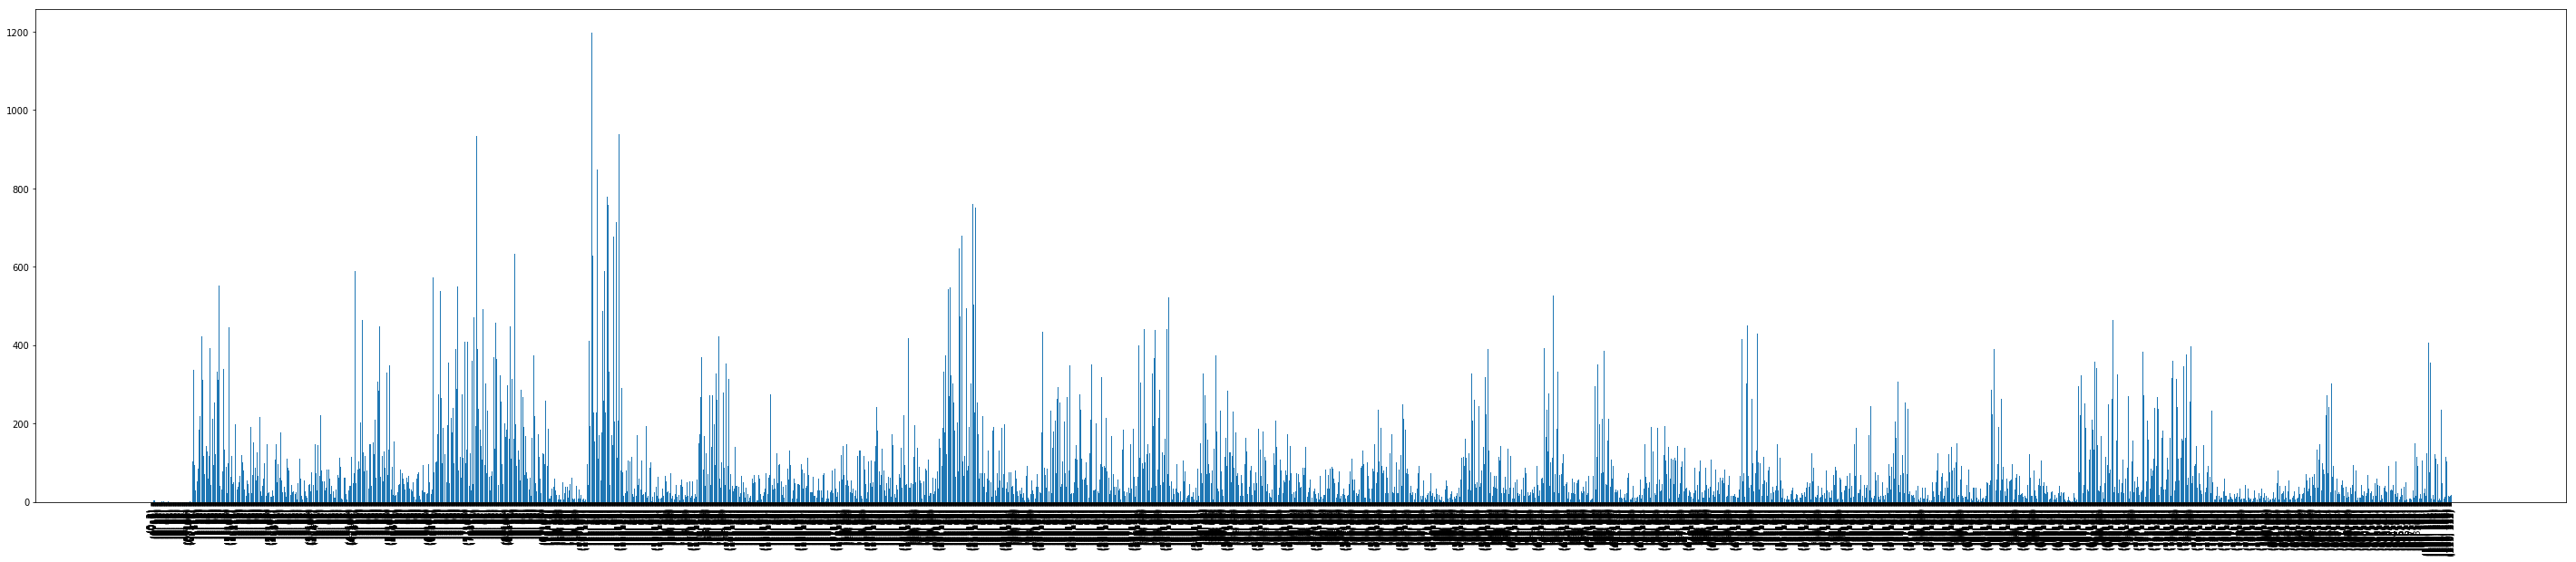

In [208]:
x = np.arange(len(win_count_2_heroes))
y = win_count_2_heroes.values()
plt.figure(figsize=(50,10))
plt.bar(x, y)
plt.xticks(x, win_count_2_heroes.keys(), rotation='vertical')
plt.show()

In [2]:
hero_names = pd.read_csv("hero_names.csv")

In [3]:
df = pd.read_csv("players.csv")

In [29]:
df1 = pd.read_csv("test_labels.csv")

In [30]:
df2 = pd.read_csv("test_player.csv")

In [34]:
df1

,match_id,radiant_win
0,50000,0
1,50001,1
2,50002,0
3,50003,1
4,50004,0
5,50005,1
6,50006,1
7,50007,0
8,50008,0
9,50009,1


# HERO PICK 

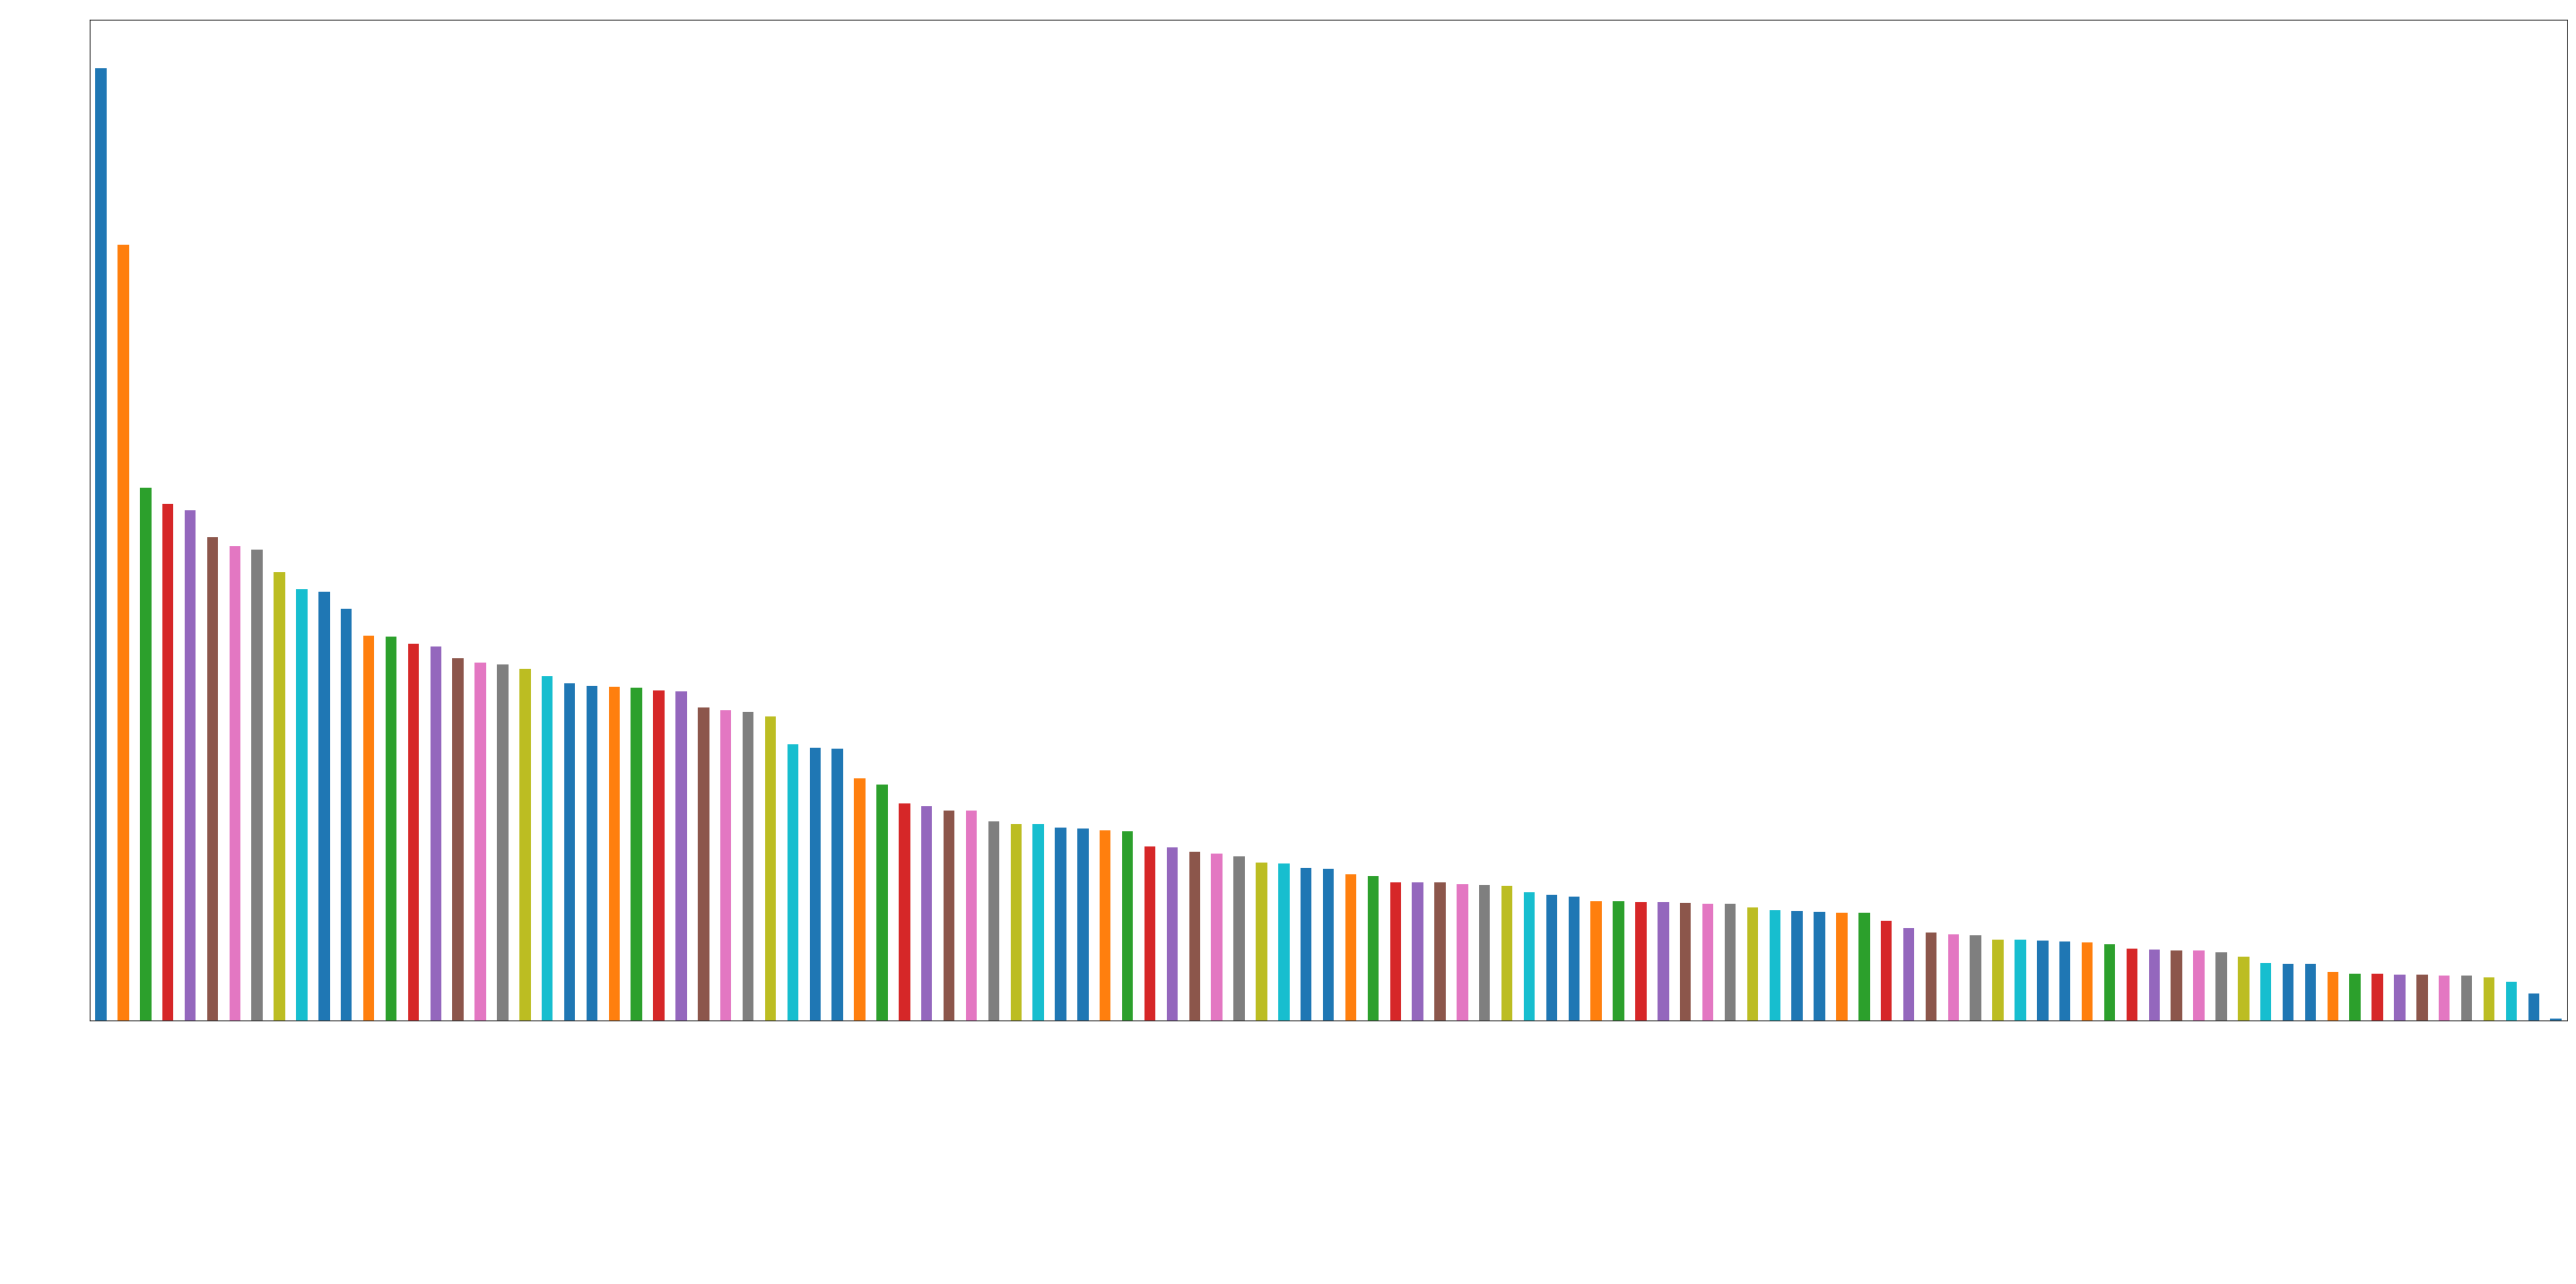

In [6]:
ax = df.groupby('hero_id').size().sort_values(axis=0, ascending=False, inplace=False).plot(kind='bar',title="HERO PICK COUNT",figsize=(40,20),fontsize=27)
hm = []
for i in df.groupby('hero_id').size().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
ax.set_xticklabels(hm)
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('hero_pick.png', transparent=True)

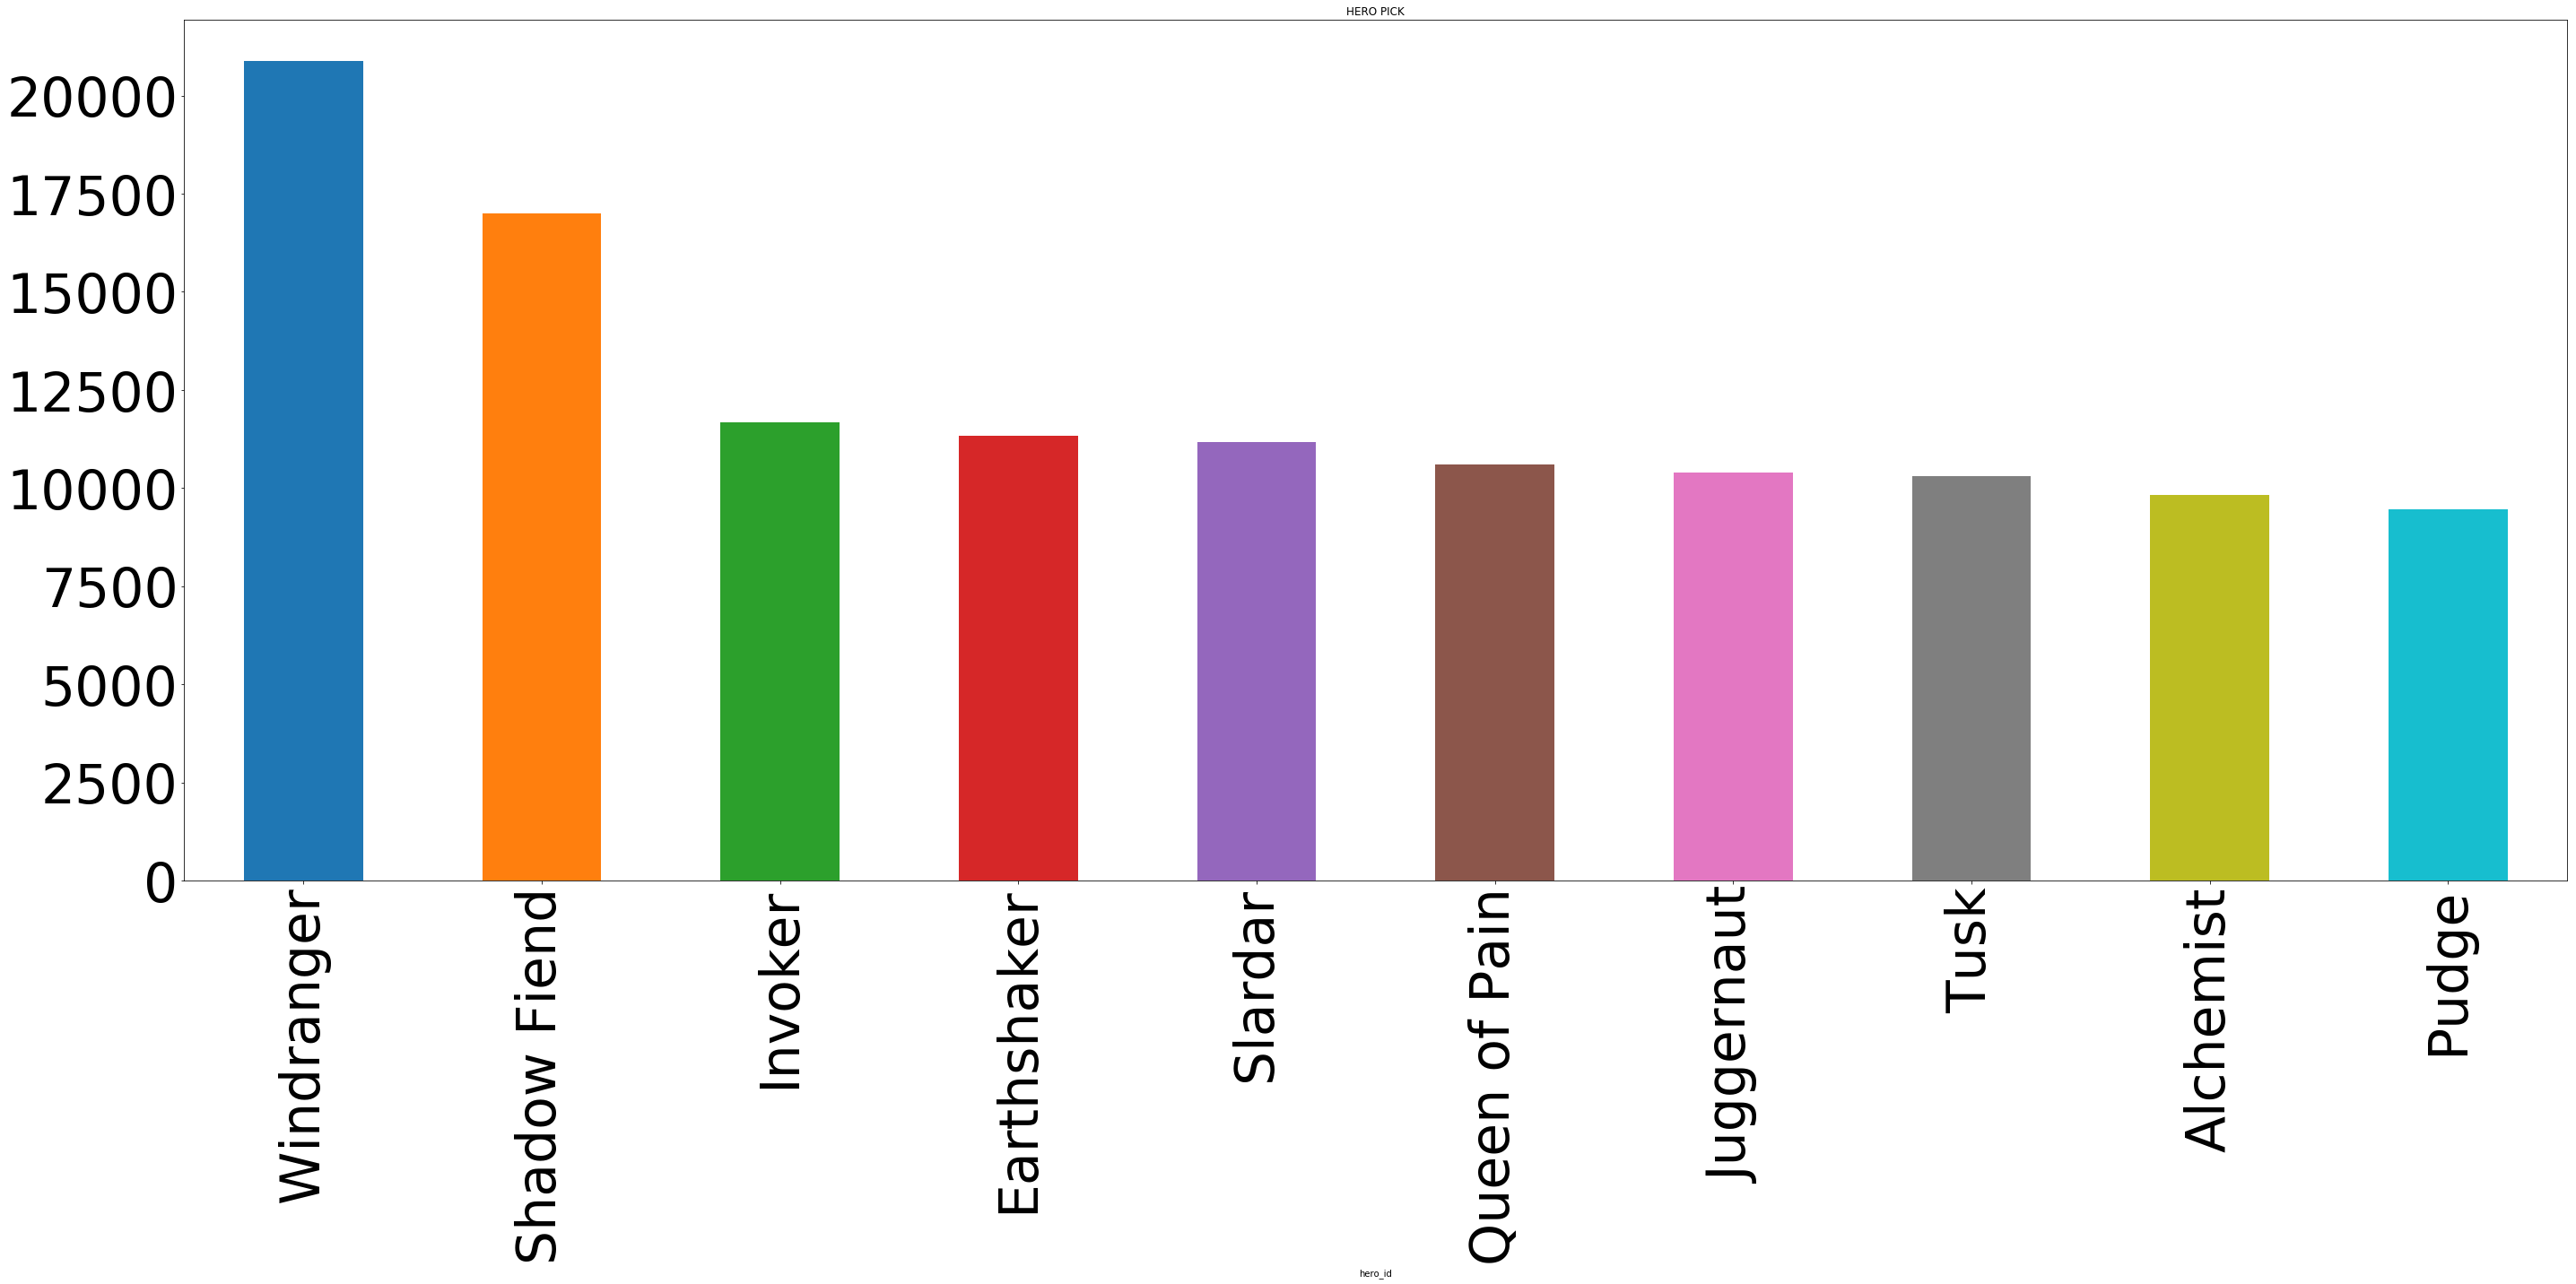

In [21]:
ax = df.groupby('hero_id').size().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="HERO PICK",figsize=(40,20),fontsize=60)
hm = []
for i in df.groupby('hero_id').size().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('hero_pick.png', transparent=True)

# last_hits

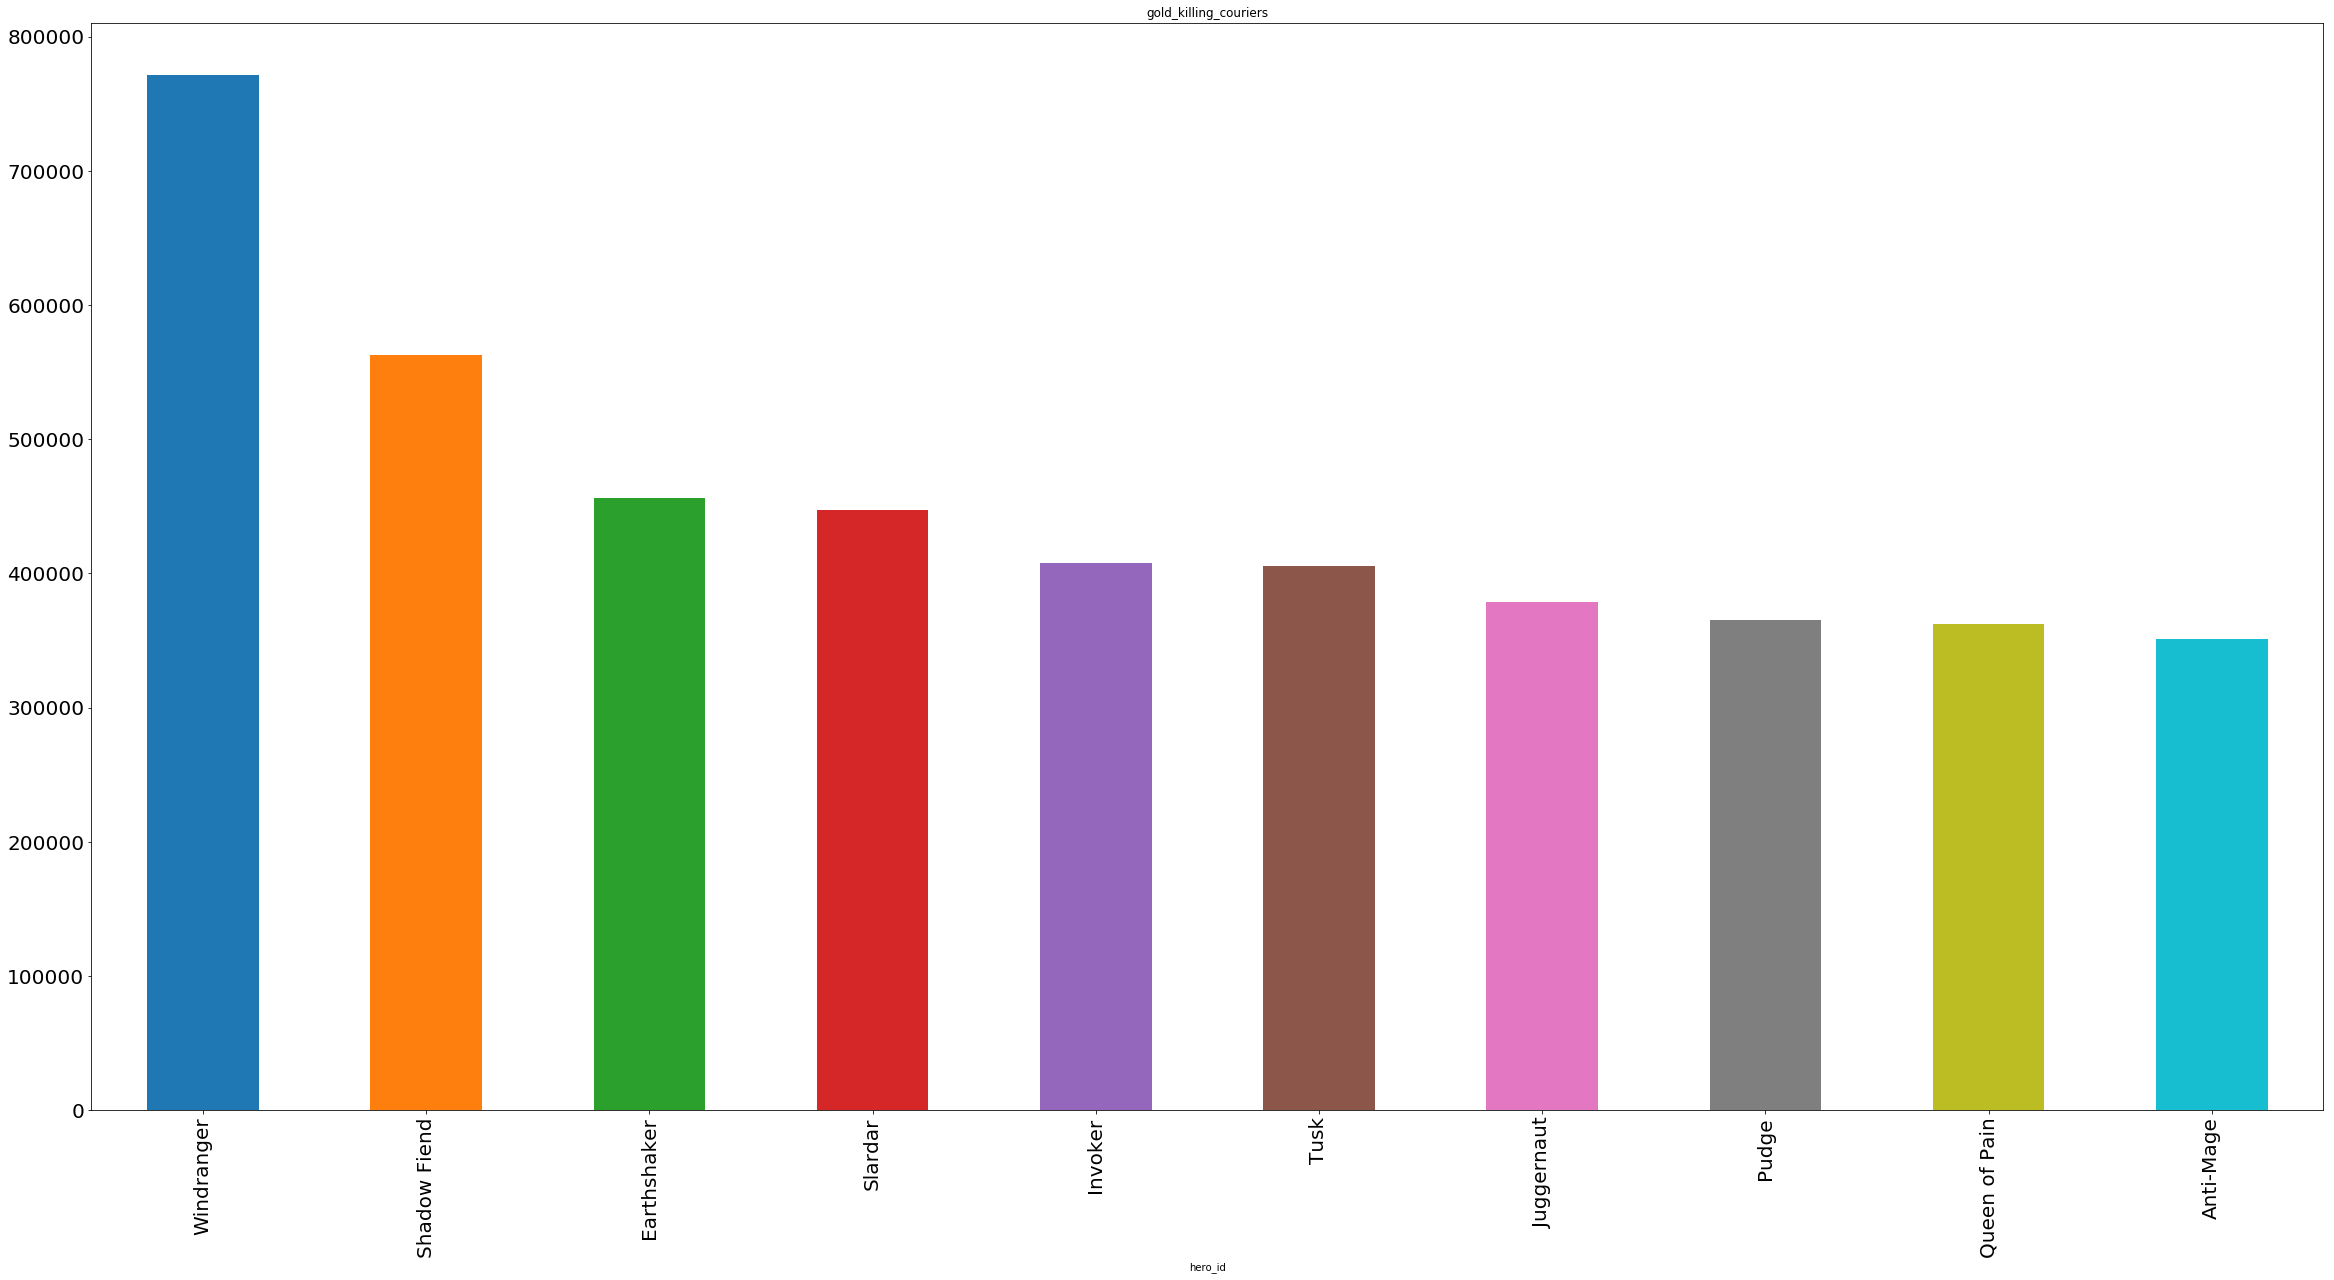

In [23]:
ax = df.groupby('hero_id')['gold_killing_couriers'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="gold_killing_couriers",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['gold_killing_couriers'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax

# xp_roshan

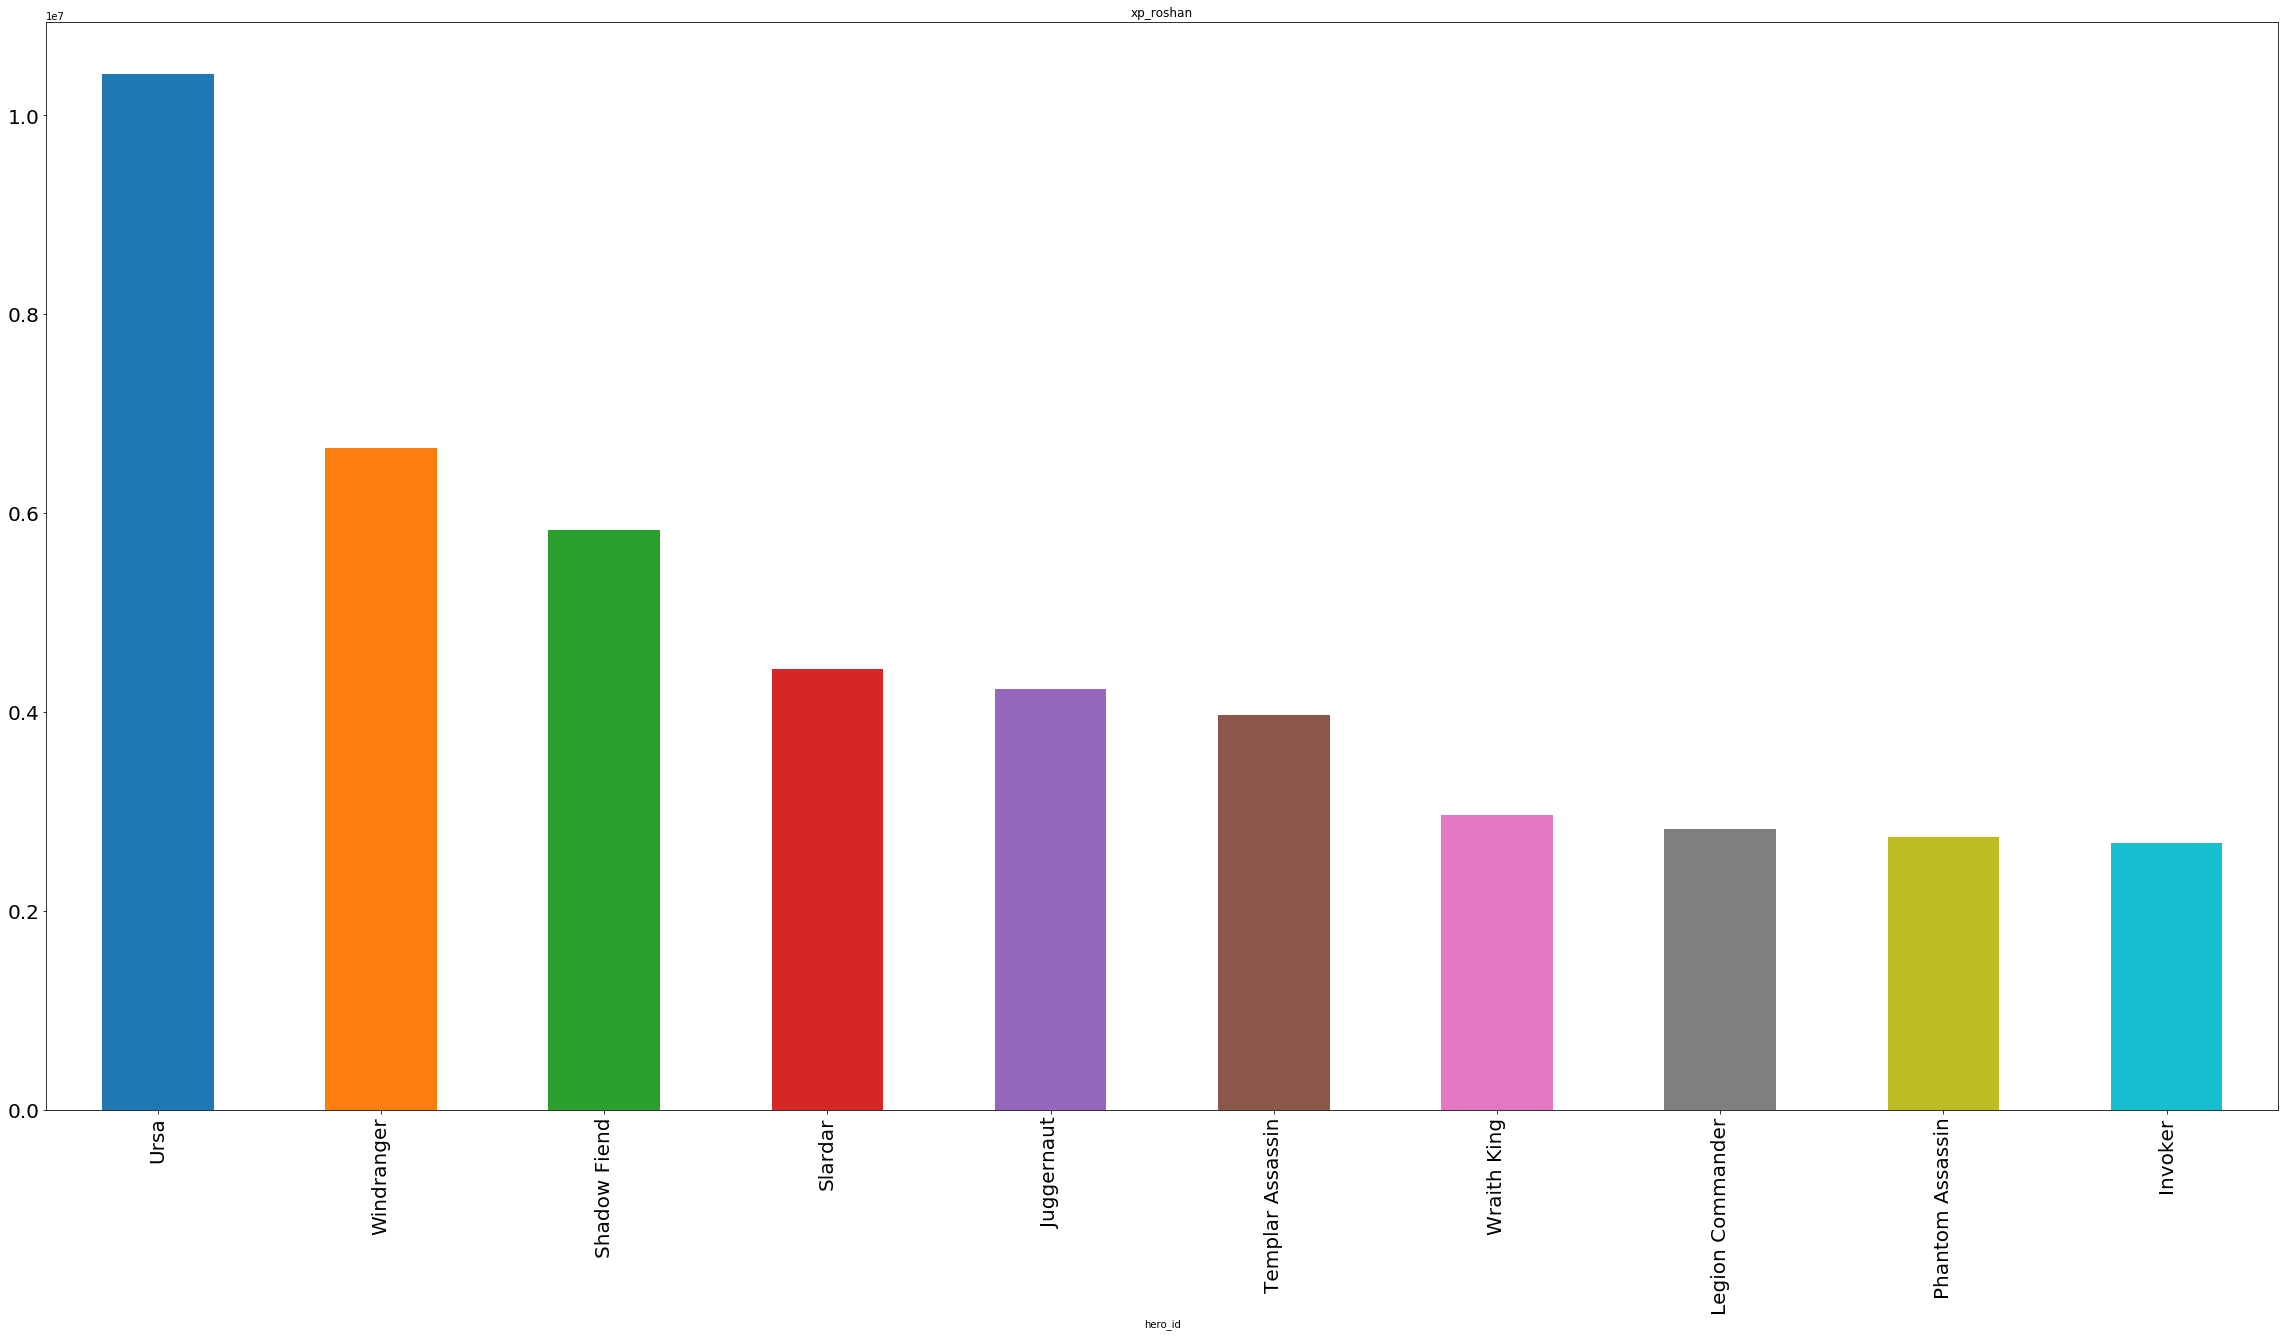

In [12]:
ax = df.groupby('hero_id')['xp_roshan'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="xp_roshan",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['xp_roshan'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax

# STUNS

In [31]:
df['stuns'].replace('None',0,inplace=True)

In [32]:
df['stuns'] = df['stuns'].apply(float)

In [34]:
ax = df.groupby('hero_id')['stuns'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="STUNS",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['stuns'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
ax = ax
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('stuns.png', transparent=True)

MemoryError: 

# ASSISTS

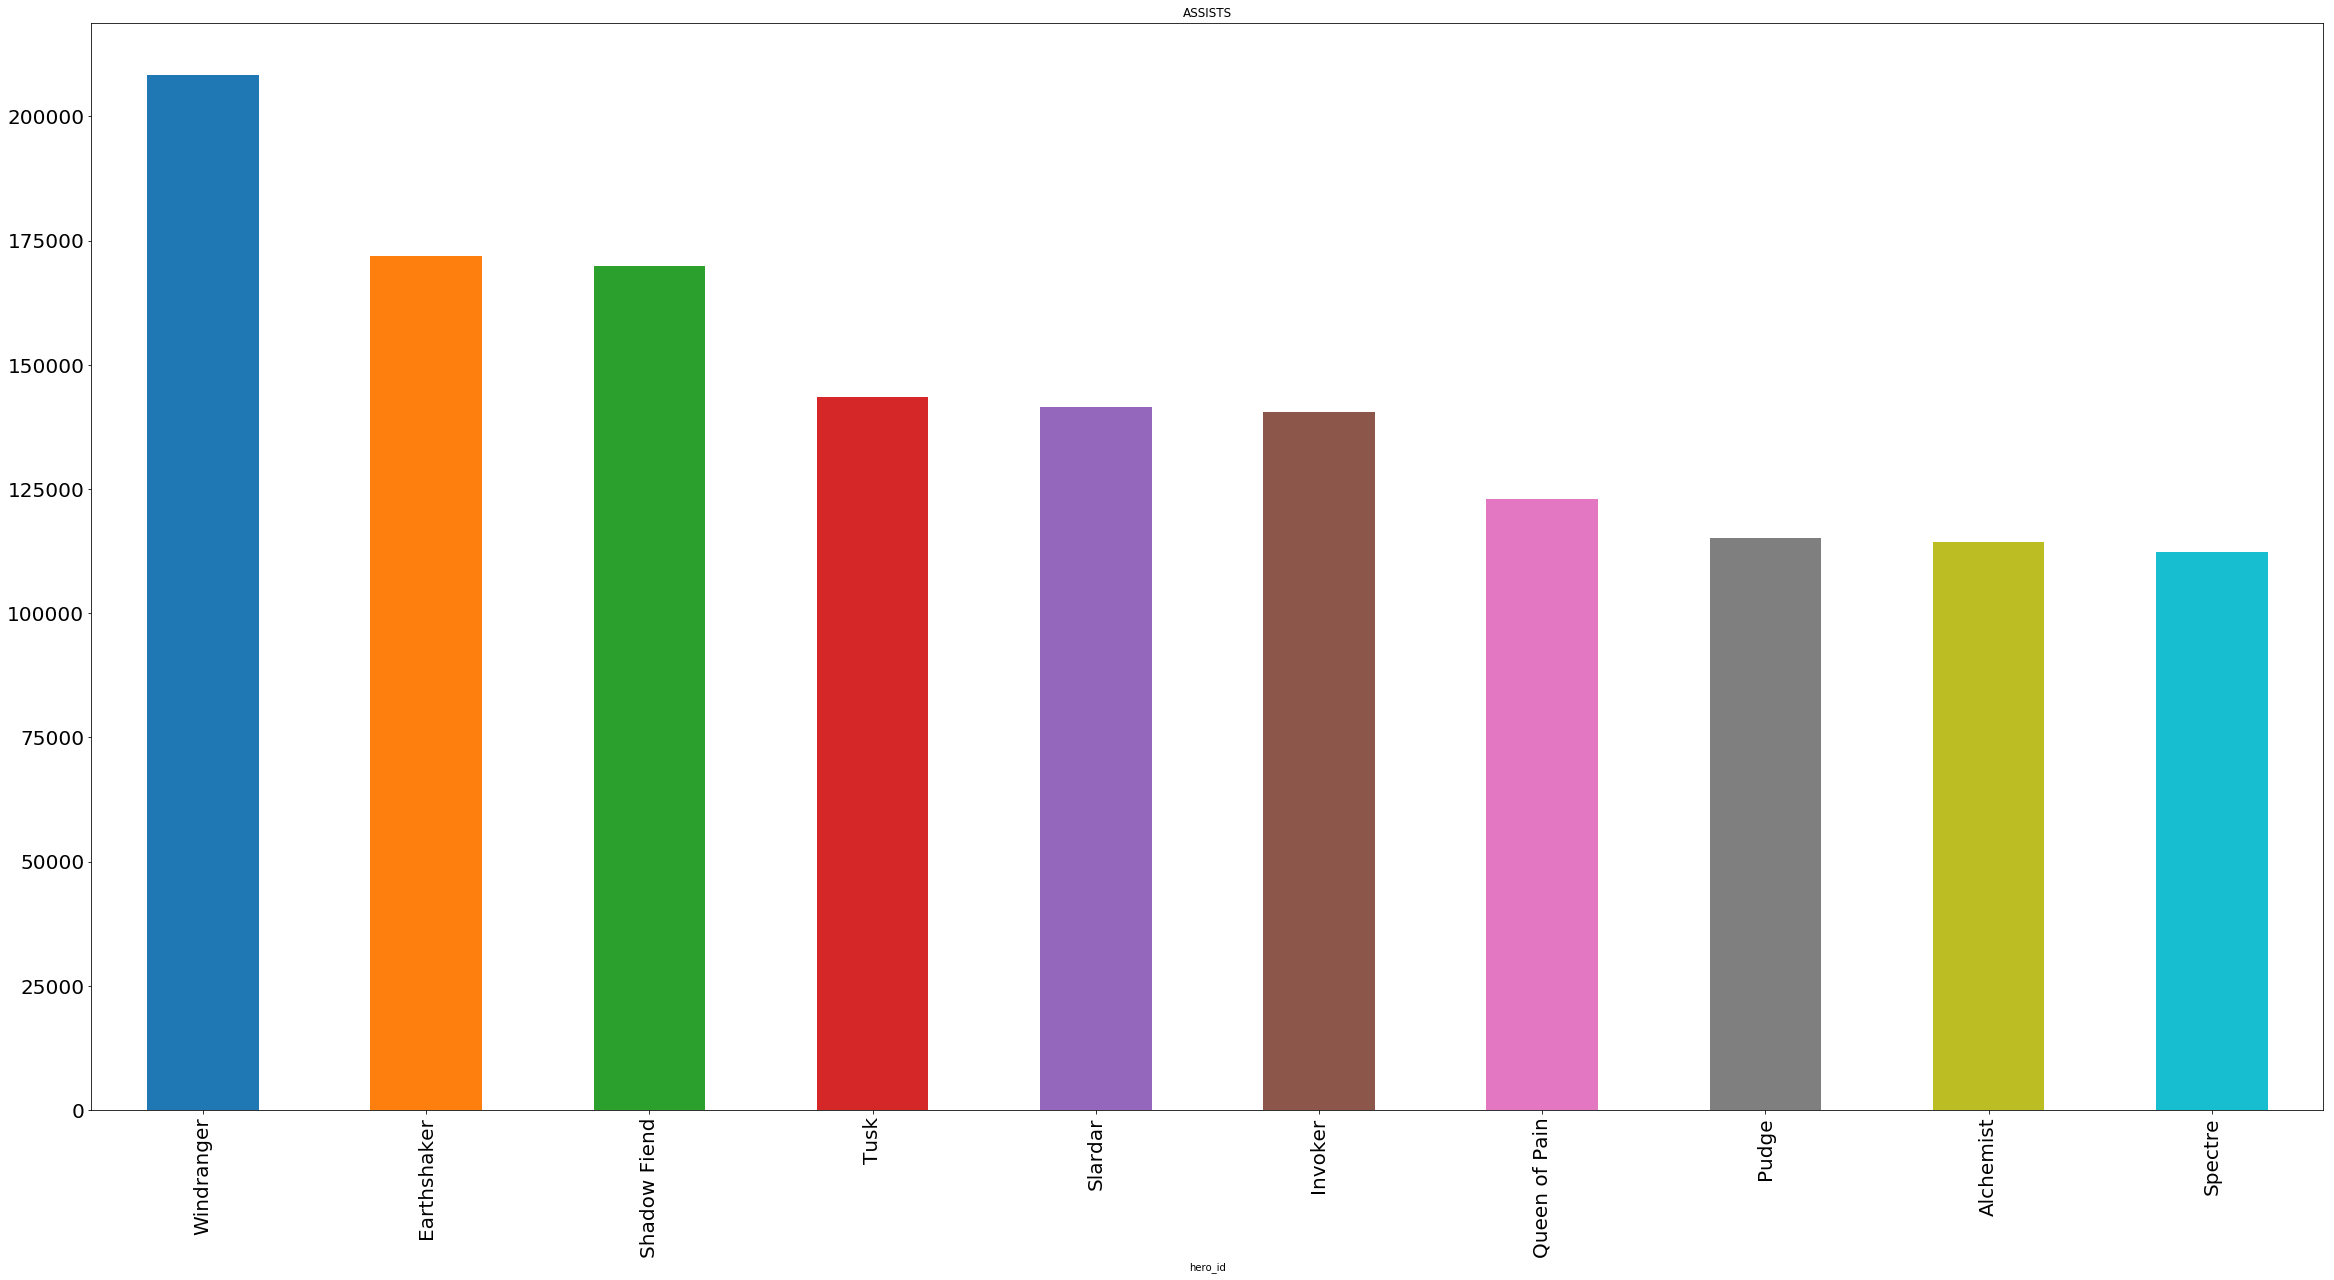

In [75]:
ax = df.groupby('hero_id')['assists'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="ASSISTS",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['assists'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax

# DEATHS

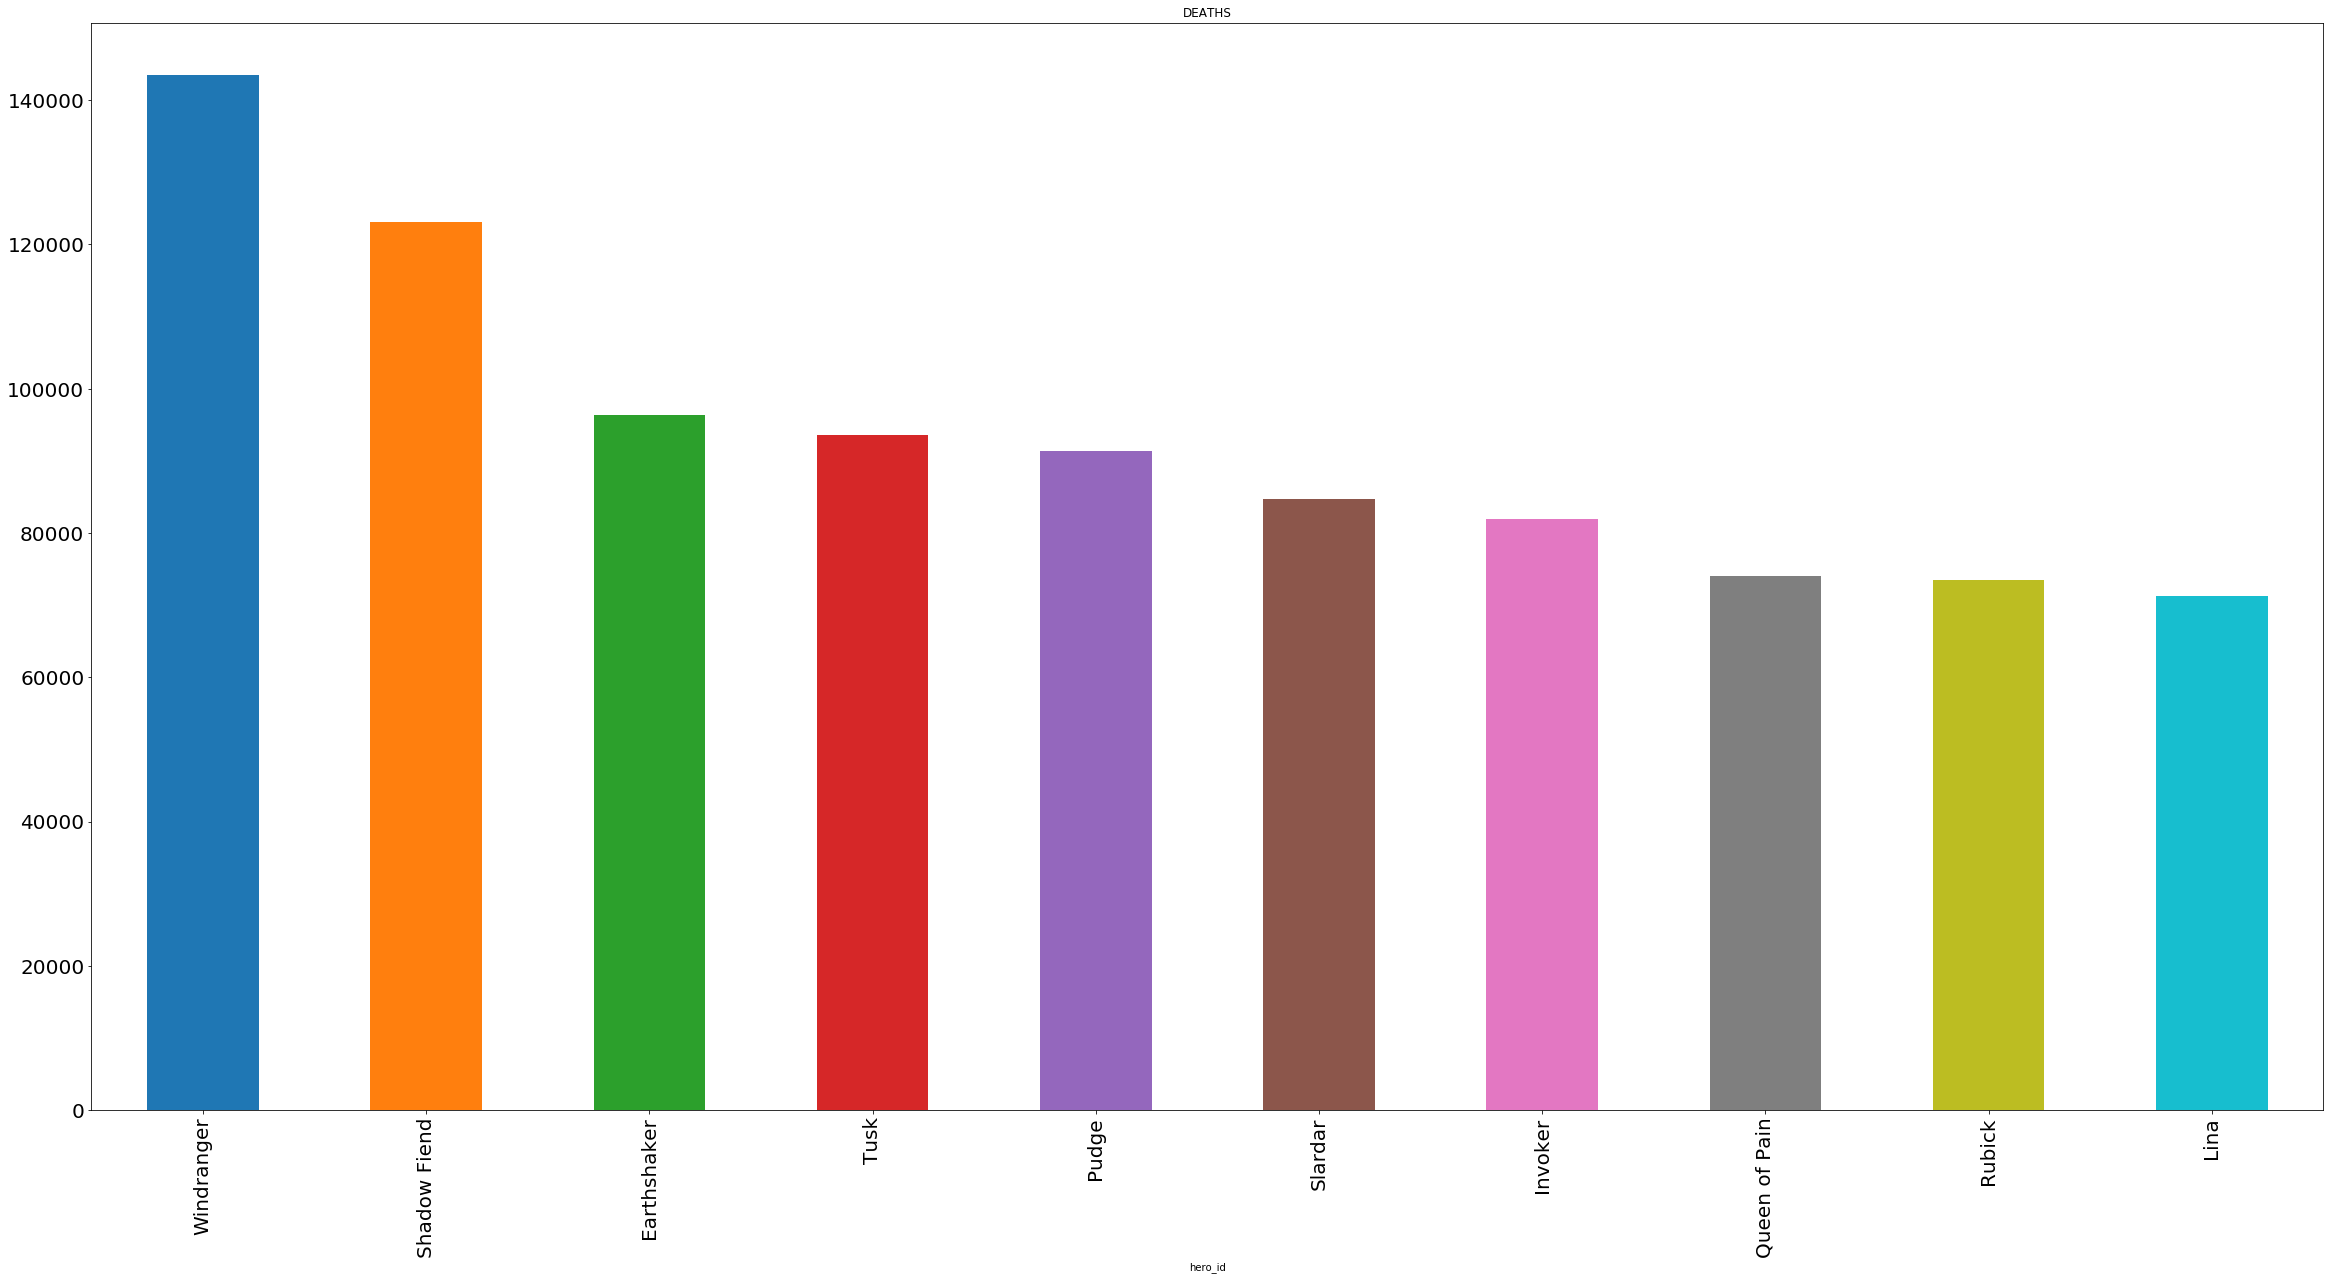

In [74]:
ax = df.groupby('hero_id')['deaths'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="DEATHS",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['deaths'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax

# GOLD

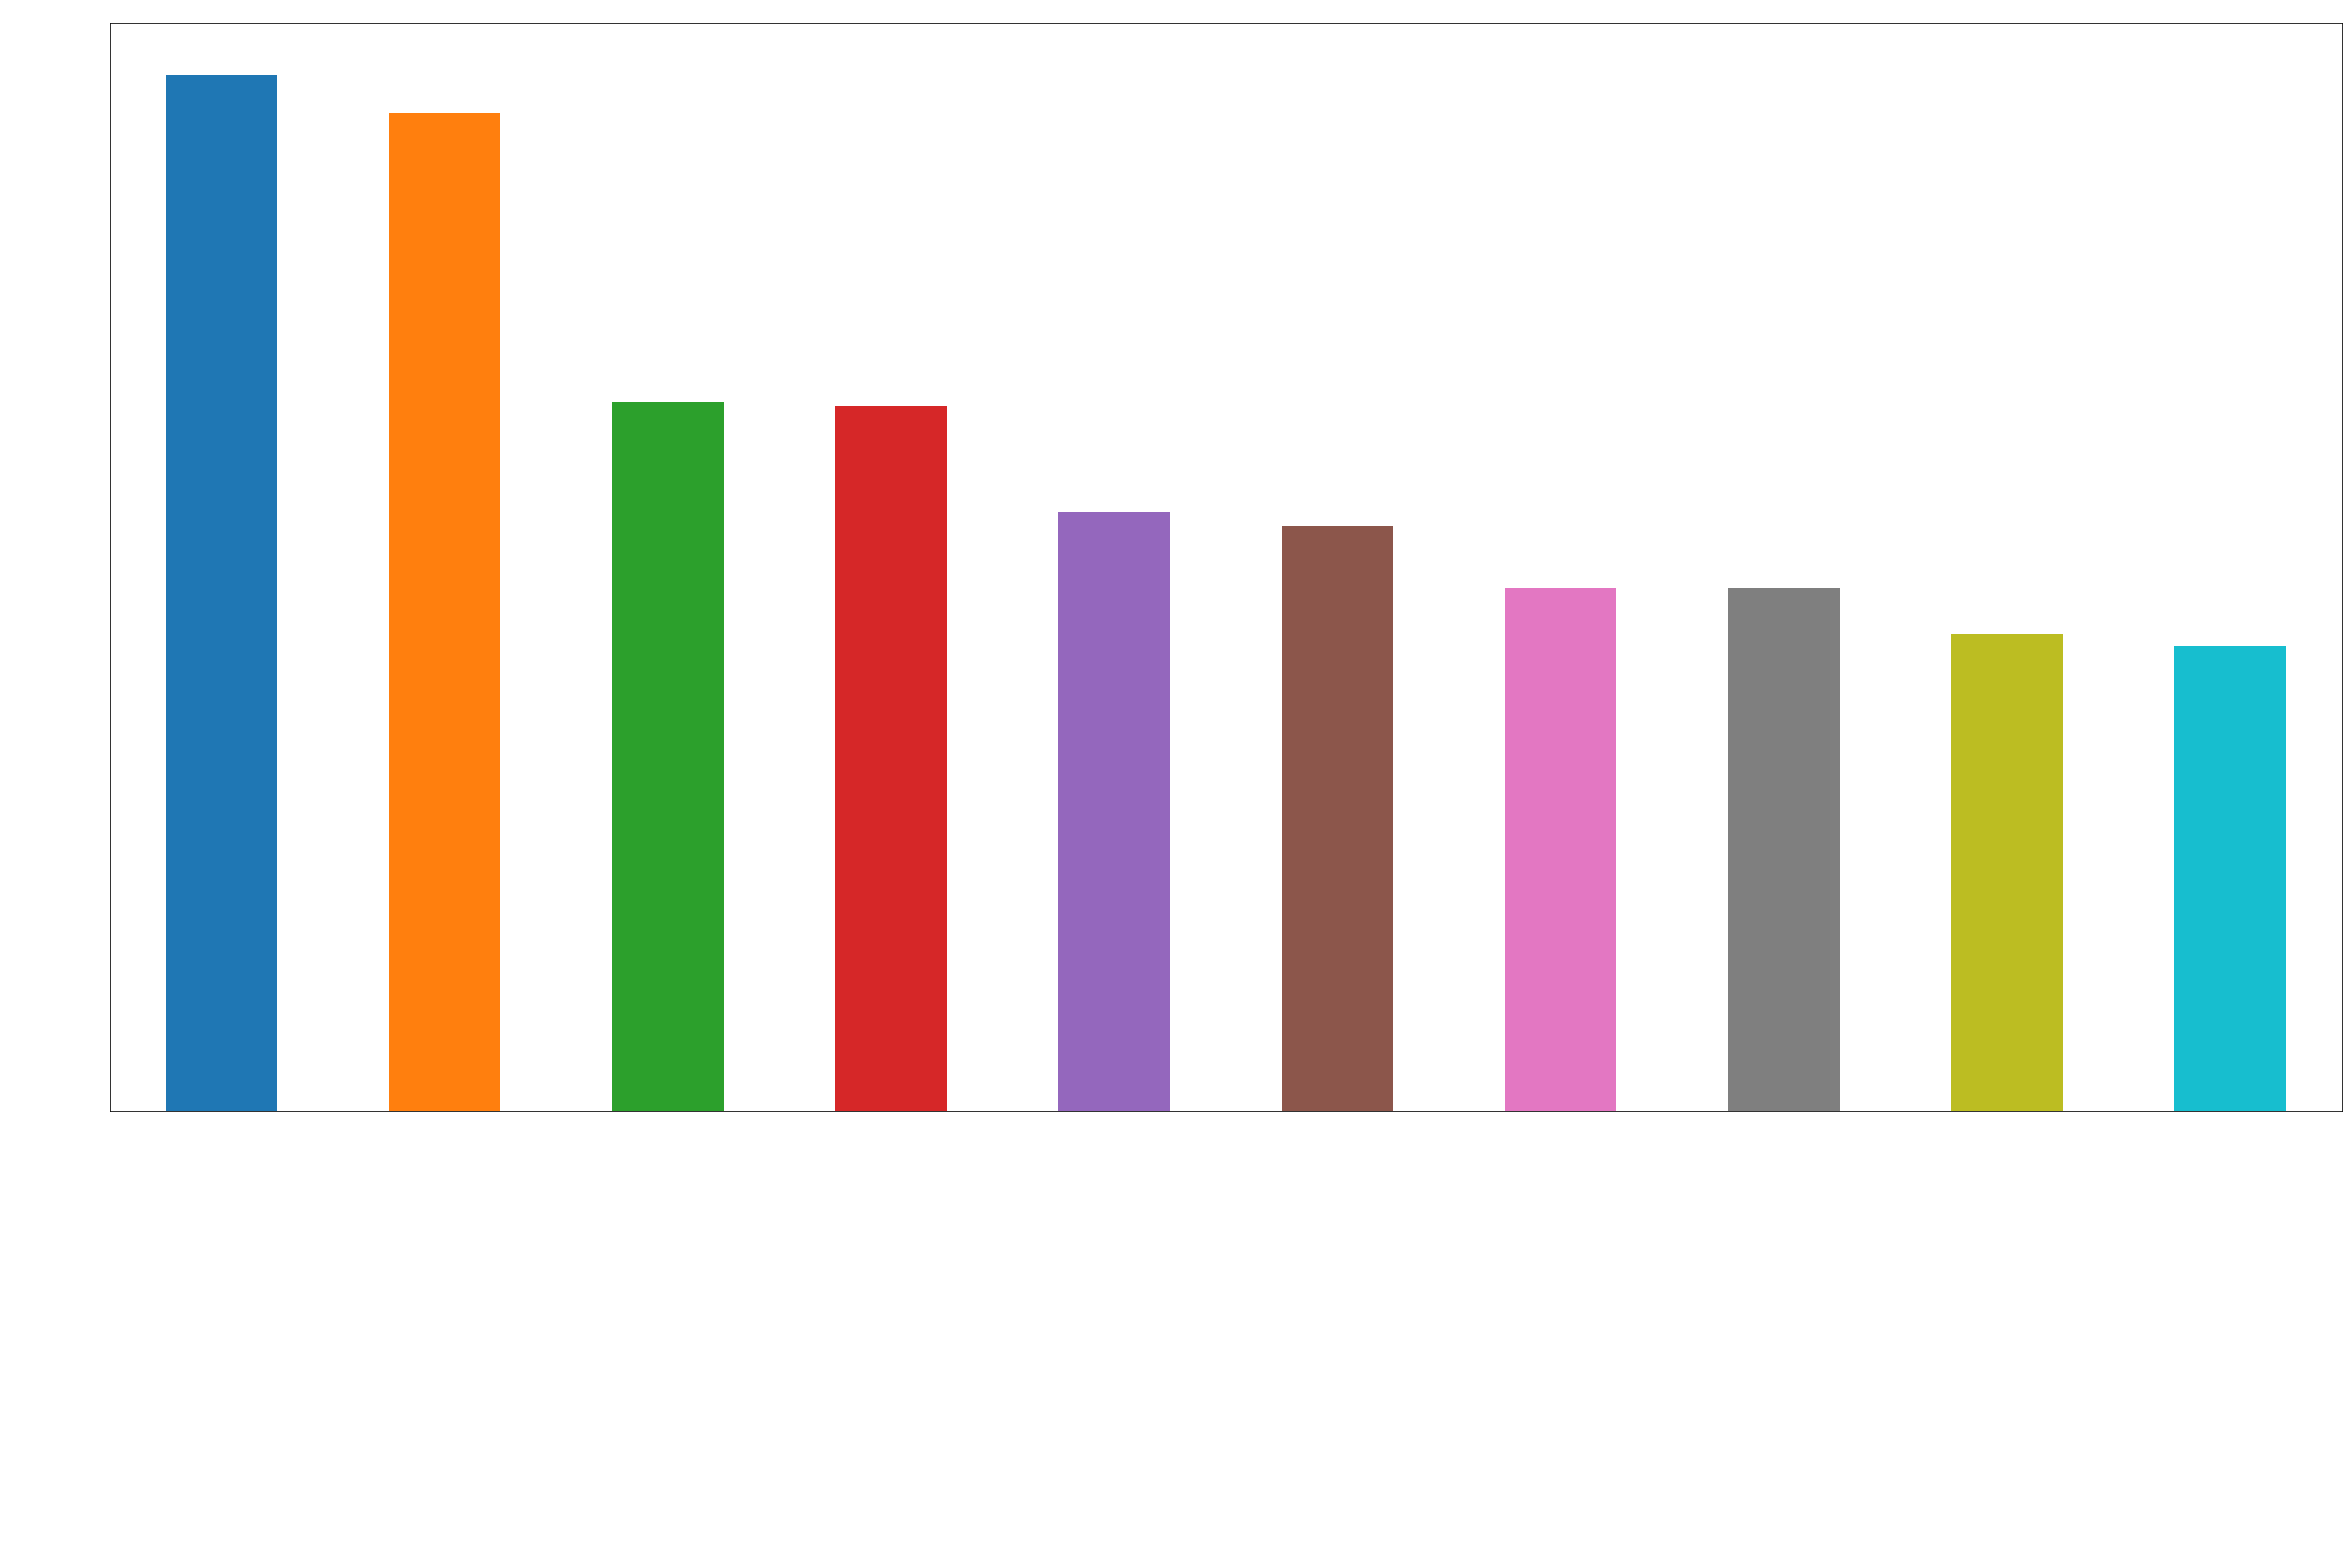

In [102]:
ax = df.groupby('hero_id')['gold'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="GOLD",figsize=(40,20),fontsize=60)
hm = []
for i in df.groupby('hero_id')['gold'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax = ax
fig = plt.gcf()
fig.savefig('gold.png', transparent=True)

# KILLS

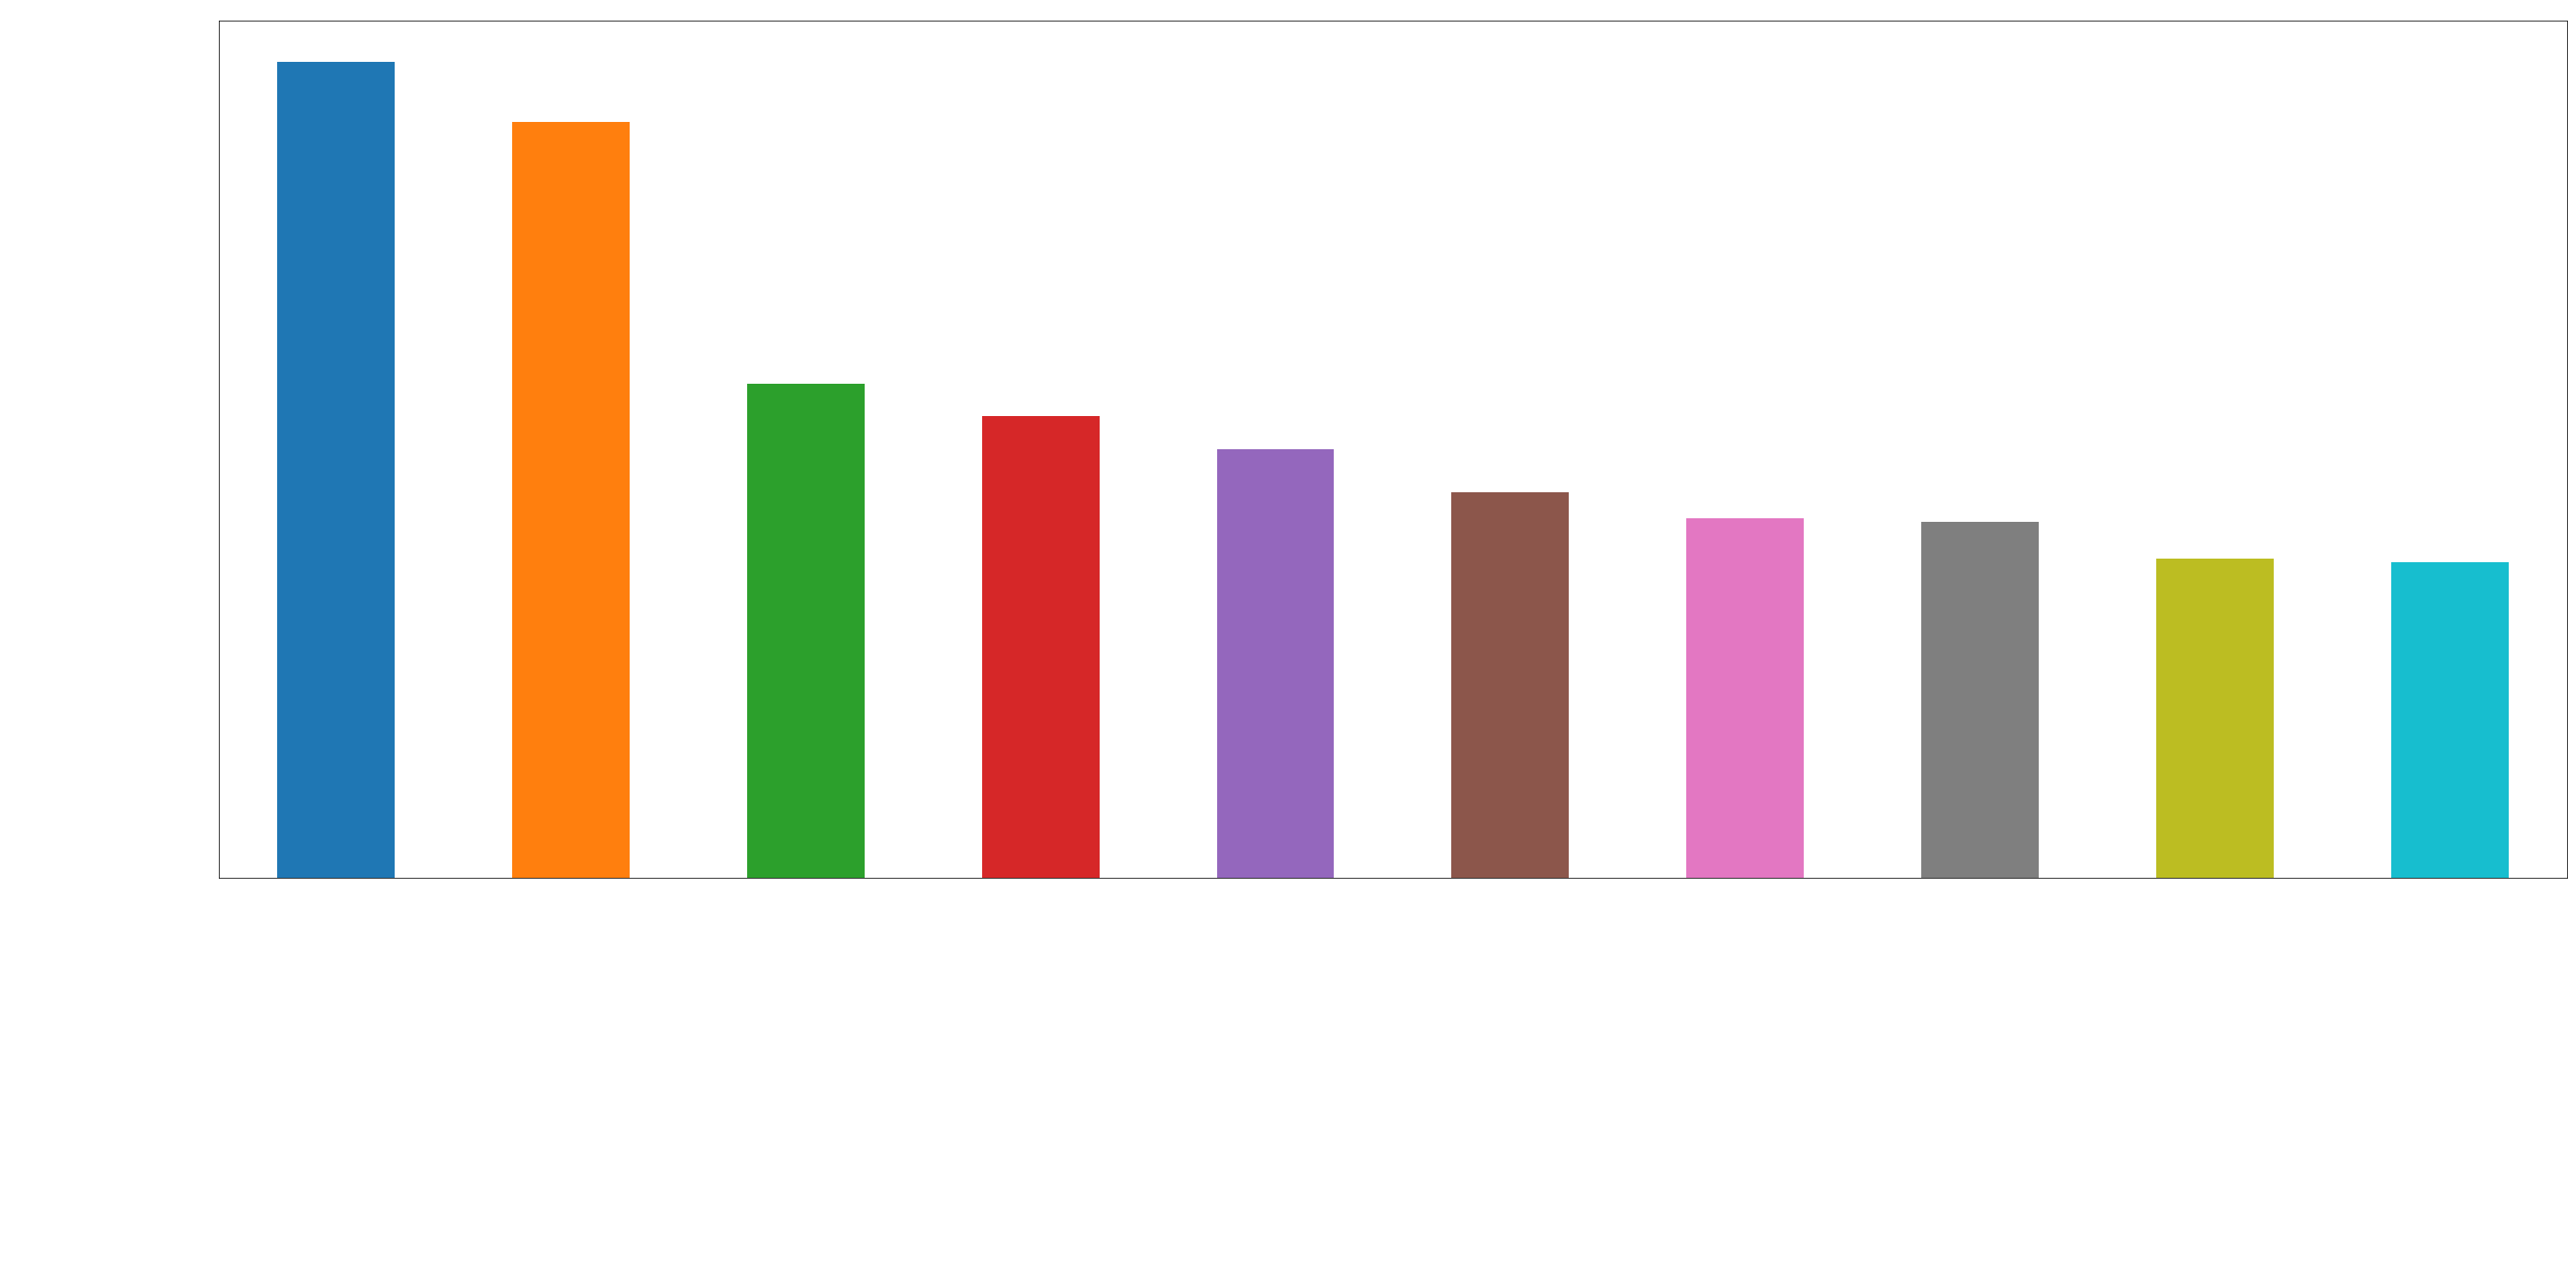

In [136]:
ax = df.groupby('hero_id')['kills'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="KILLS",figsize=(40,20),fontsize=60)
hm = []
for i in df.groupby('hero_id')['kills'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('kill.png', transparent=True)

# HERO HEALING

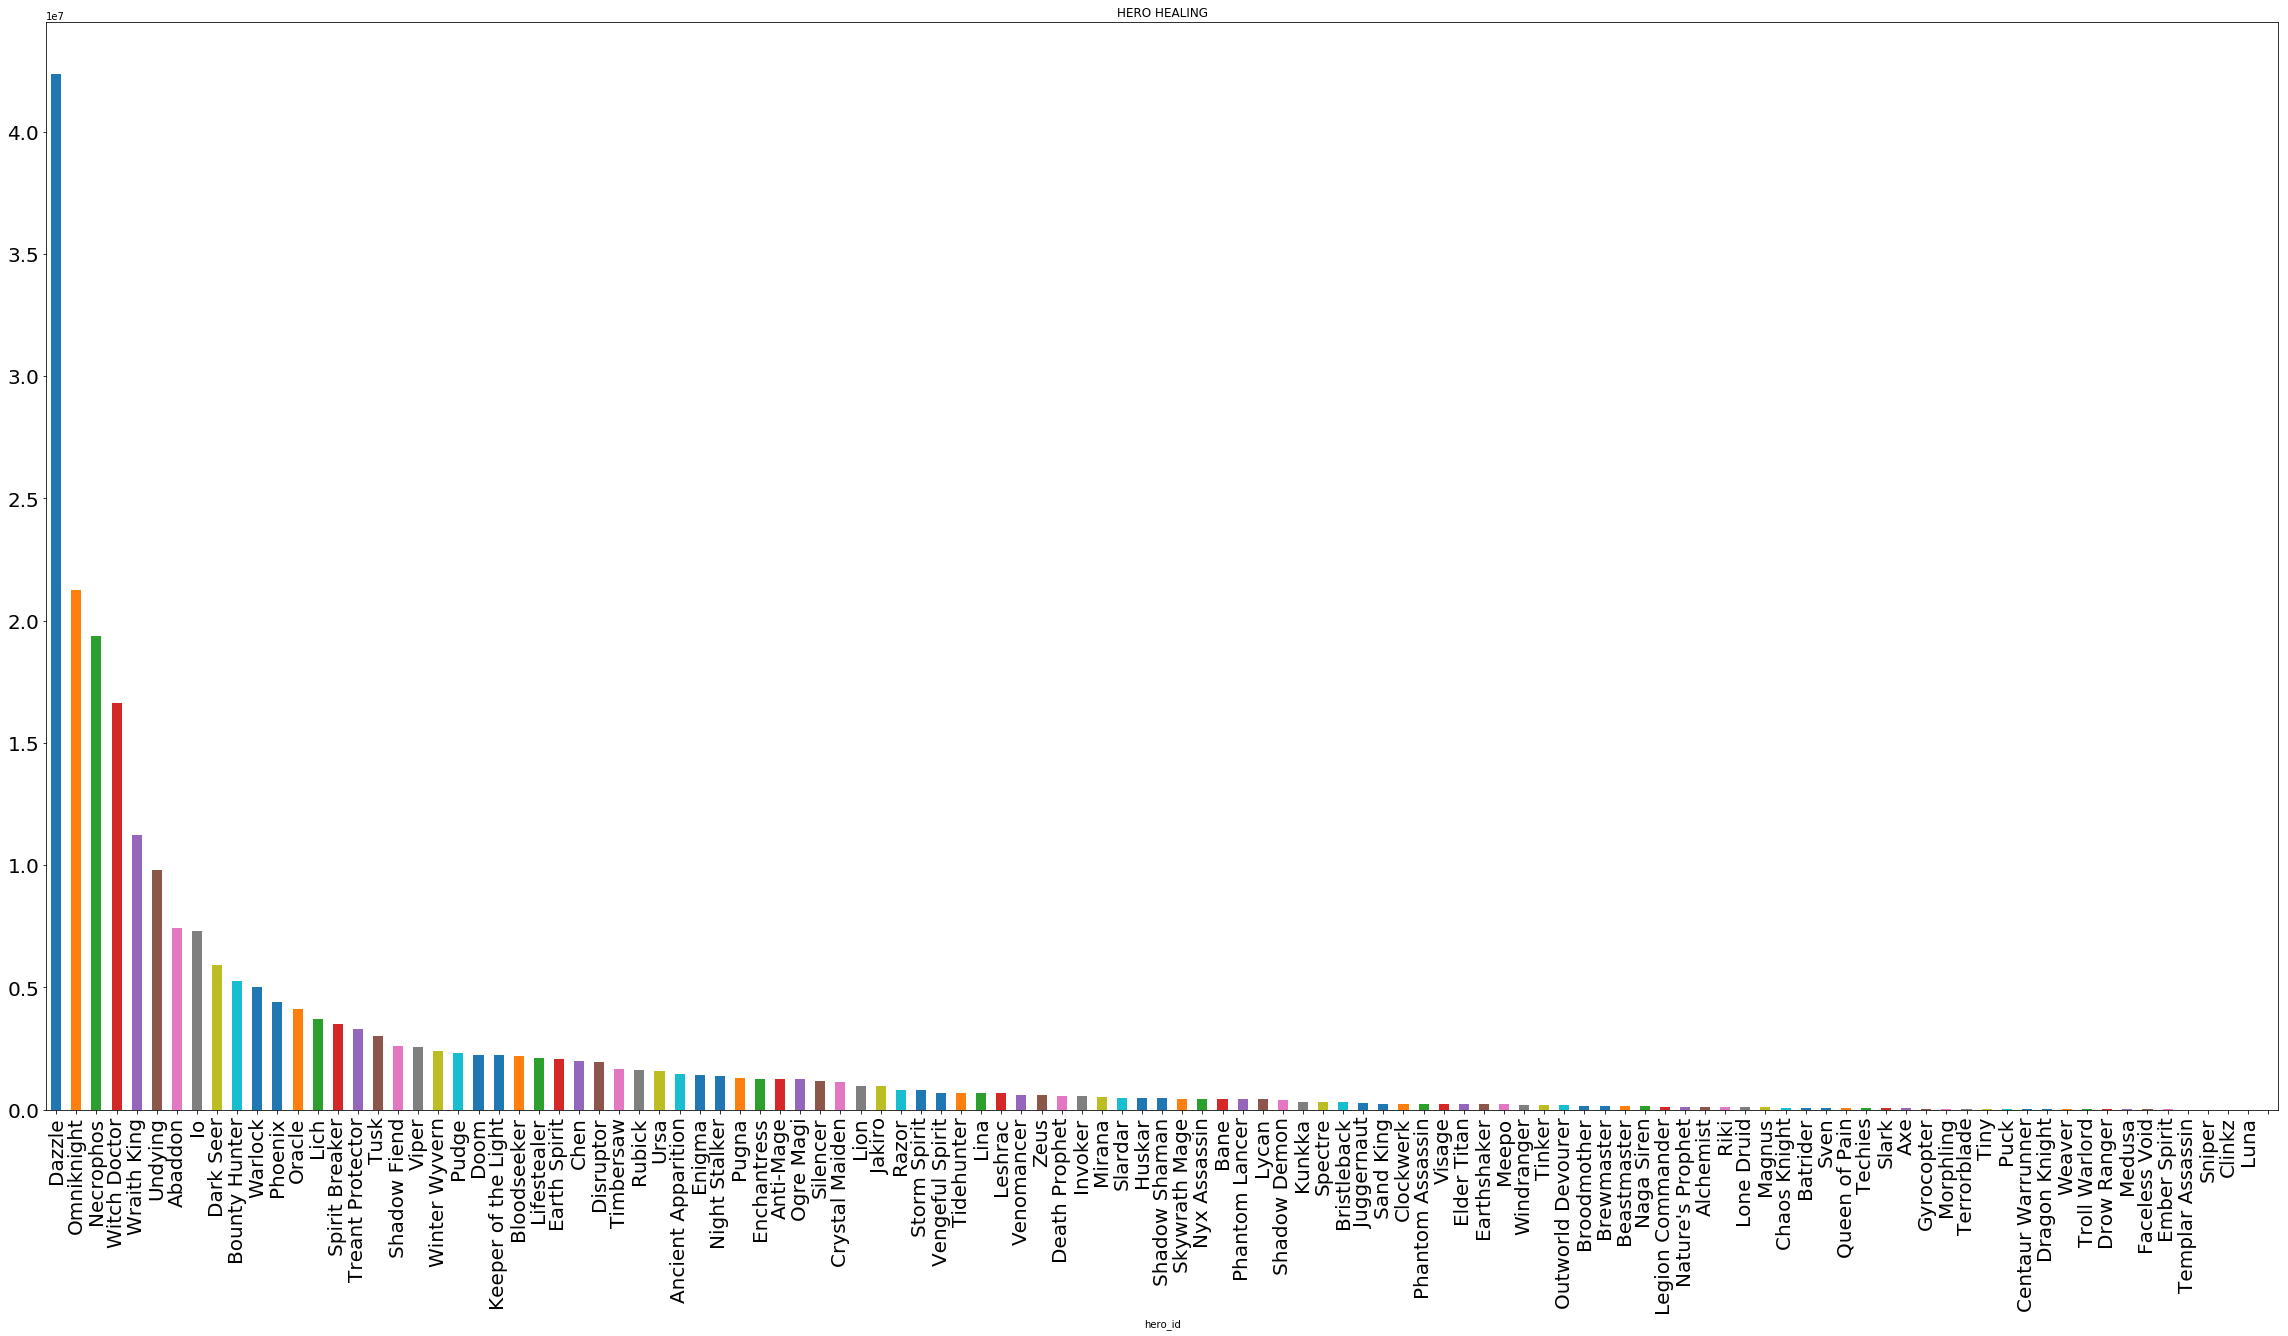

In [24]:
ax = df.groupby('hero_id')['hero_healing'].sum().sort_values(axis=0, ascending=False, inplace=False).plot(kind='bar',title="HERO HEALING",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['hero_healing'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
ax = ax
fig = plt.gcf()
fig.savefig('hero_healing.png', transparent=True)

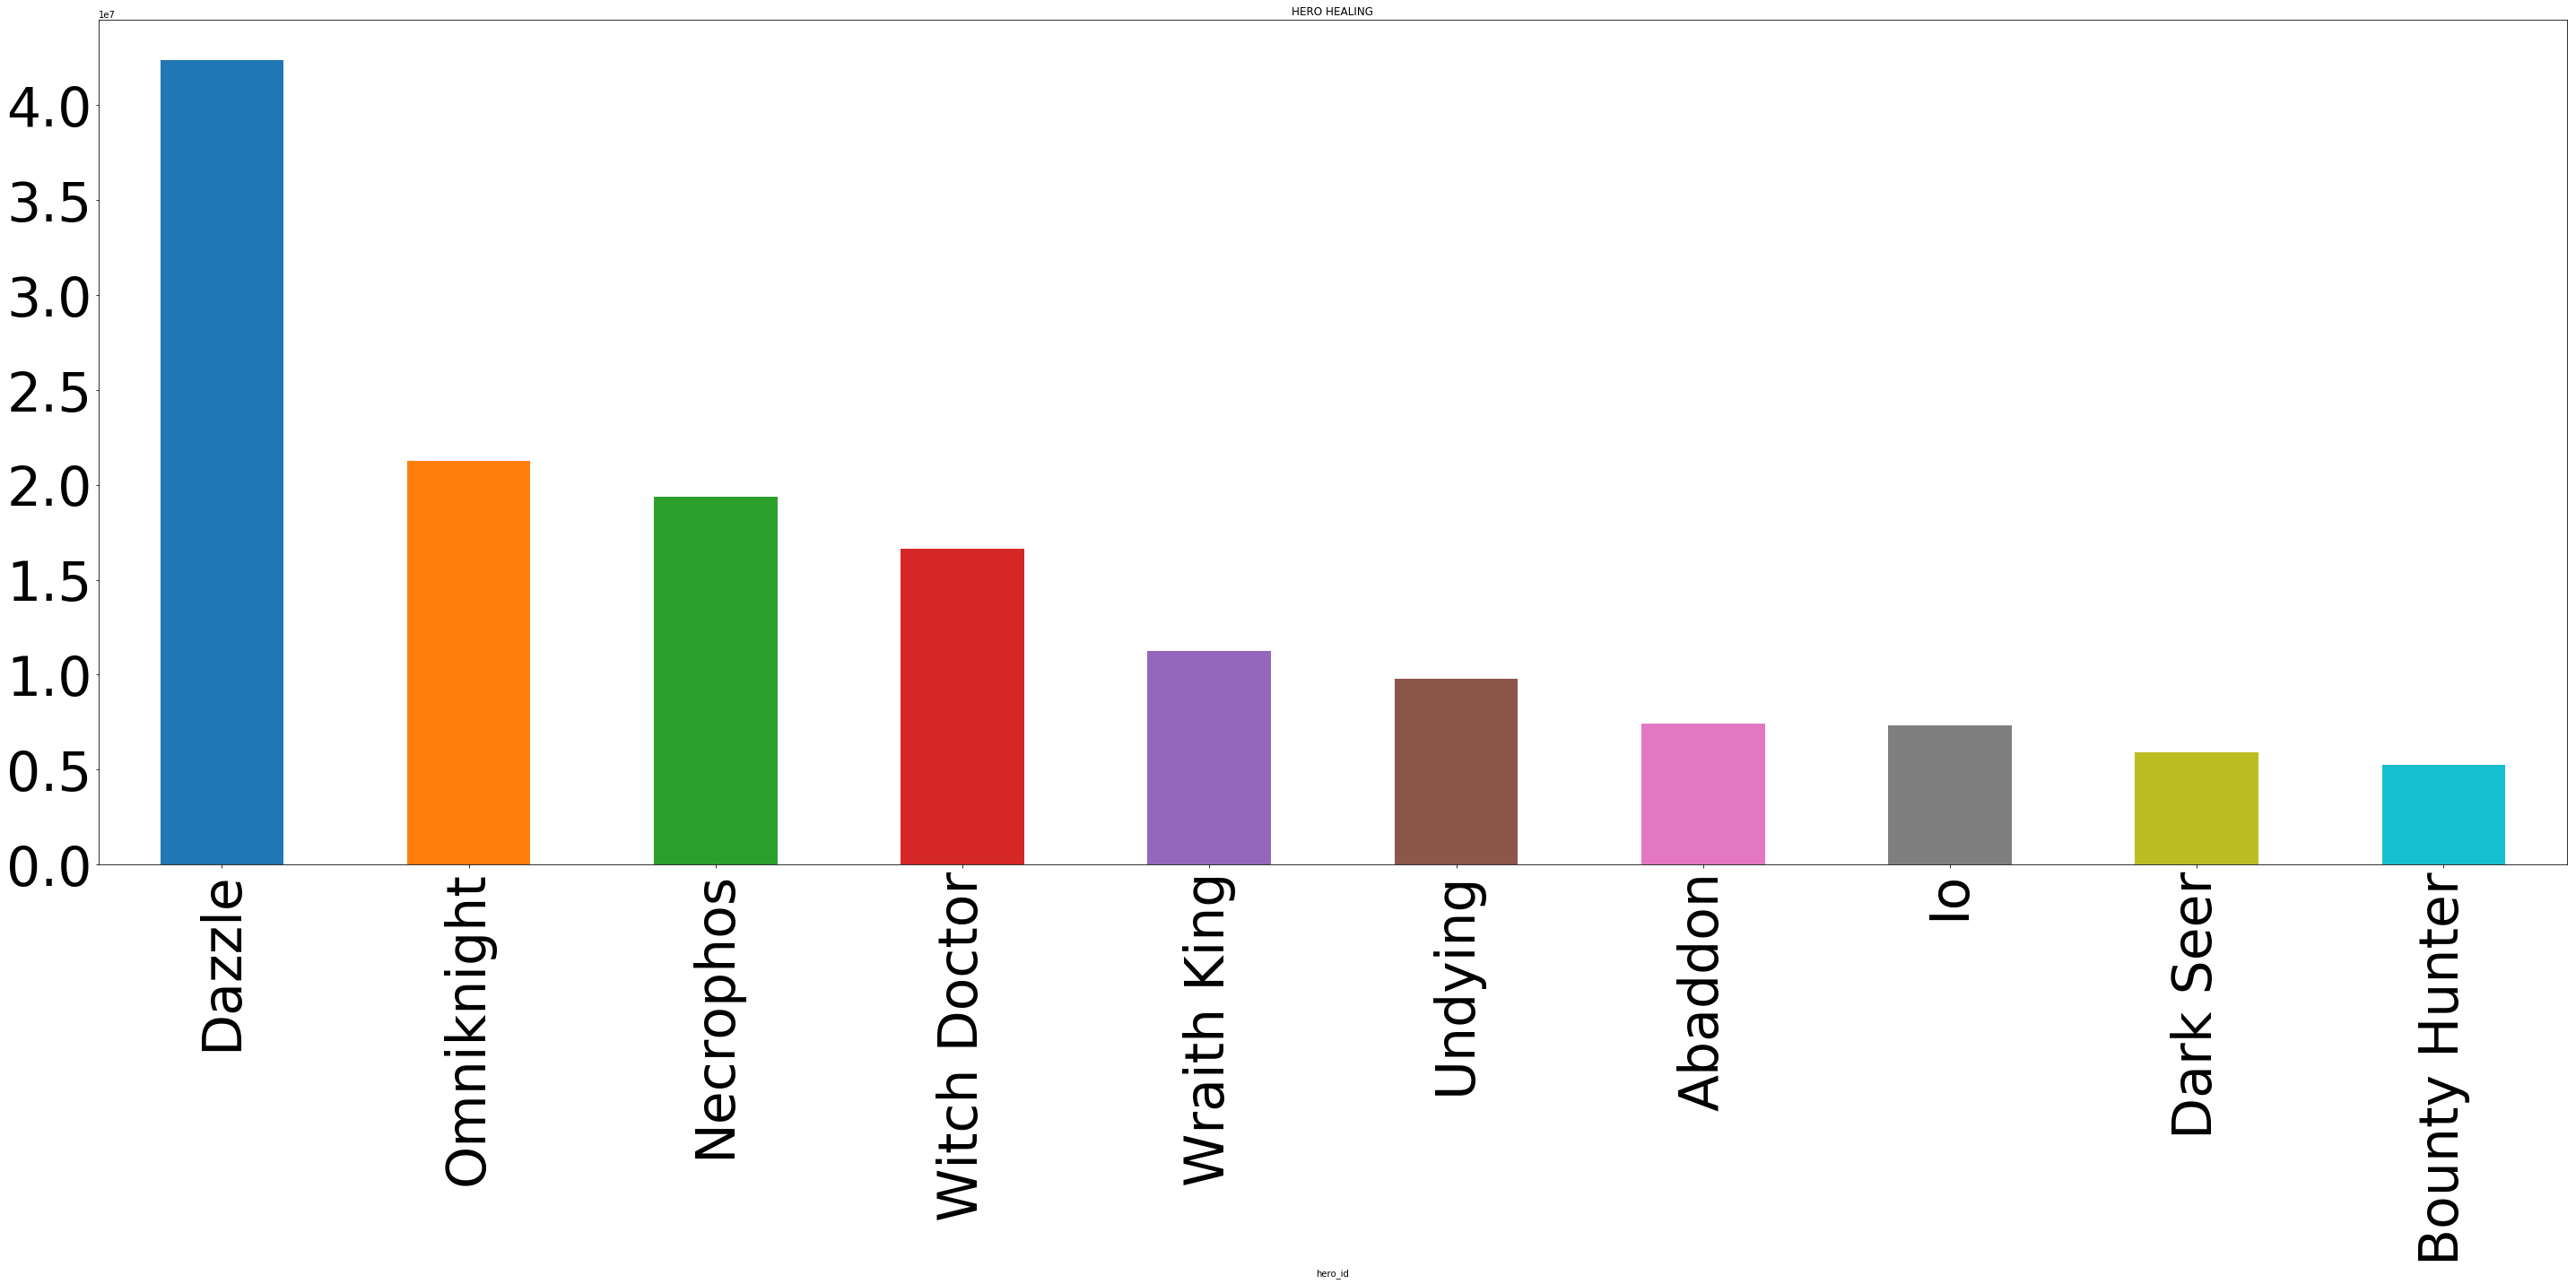

In [26]:
ax = df.groupby('hero_id')['hero_healing'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="HERO HEALING",figsize=(40,20),fontsize=60)
hm = []
for i in df.groupby('hero_id')['hero_healing'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('hero_healing.png', transparent=True)

# XP PER MIN

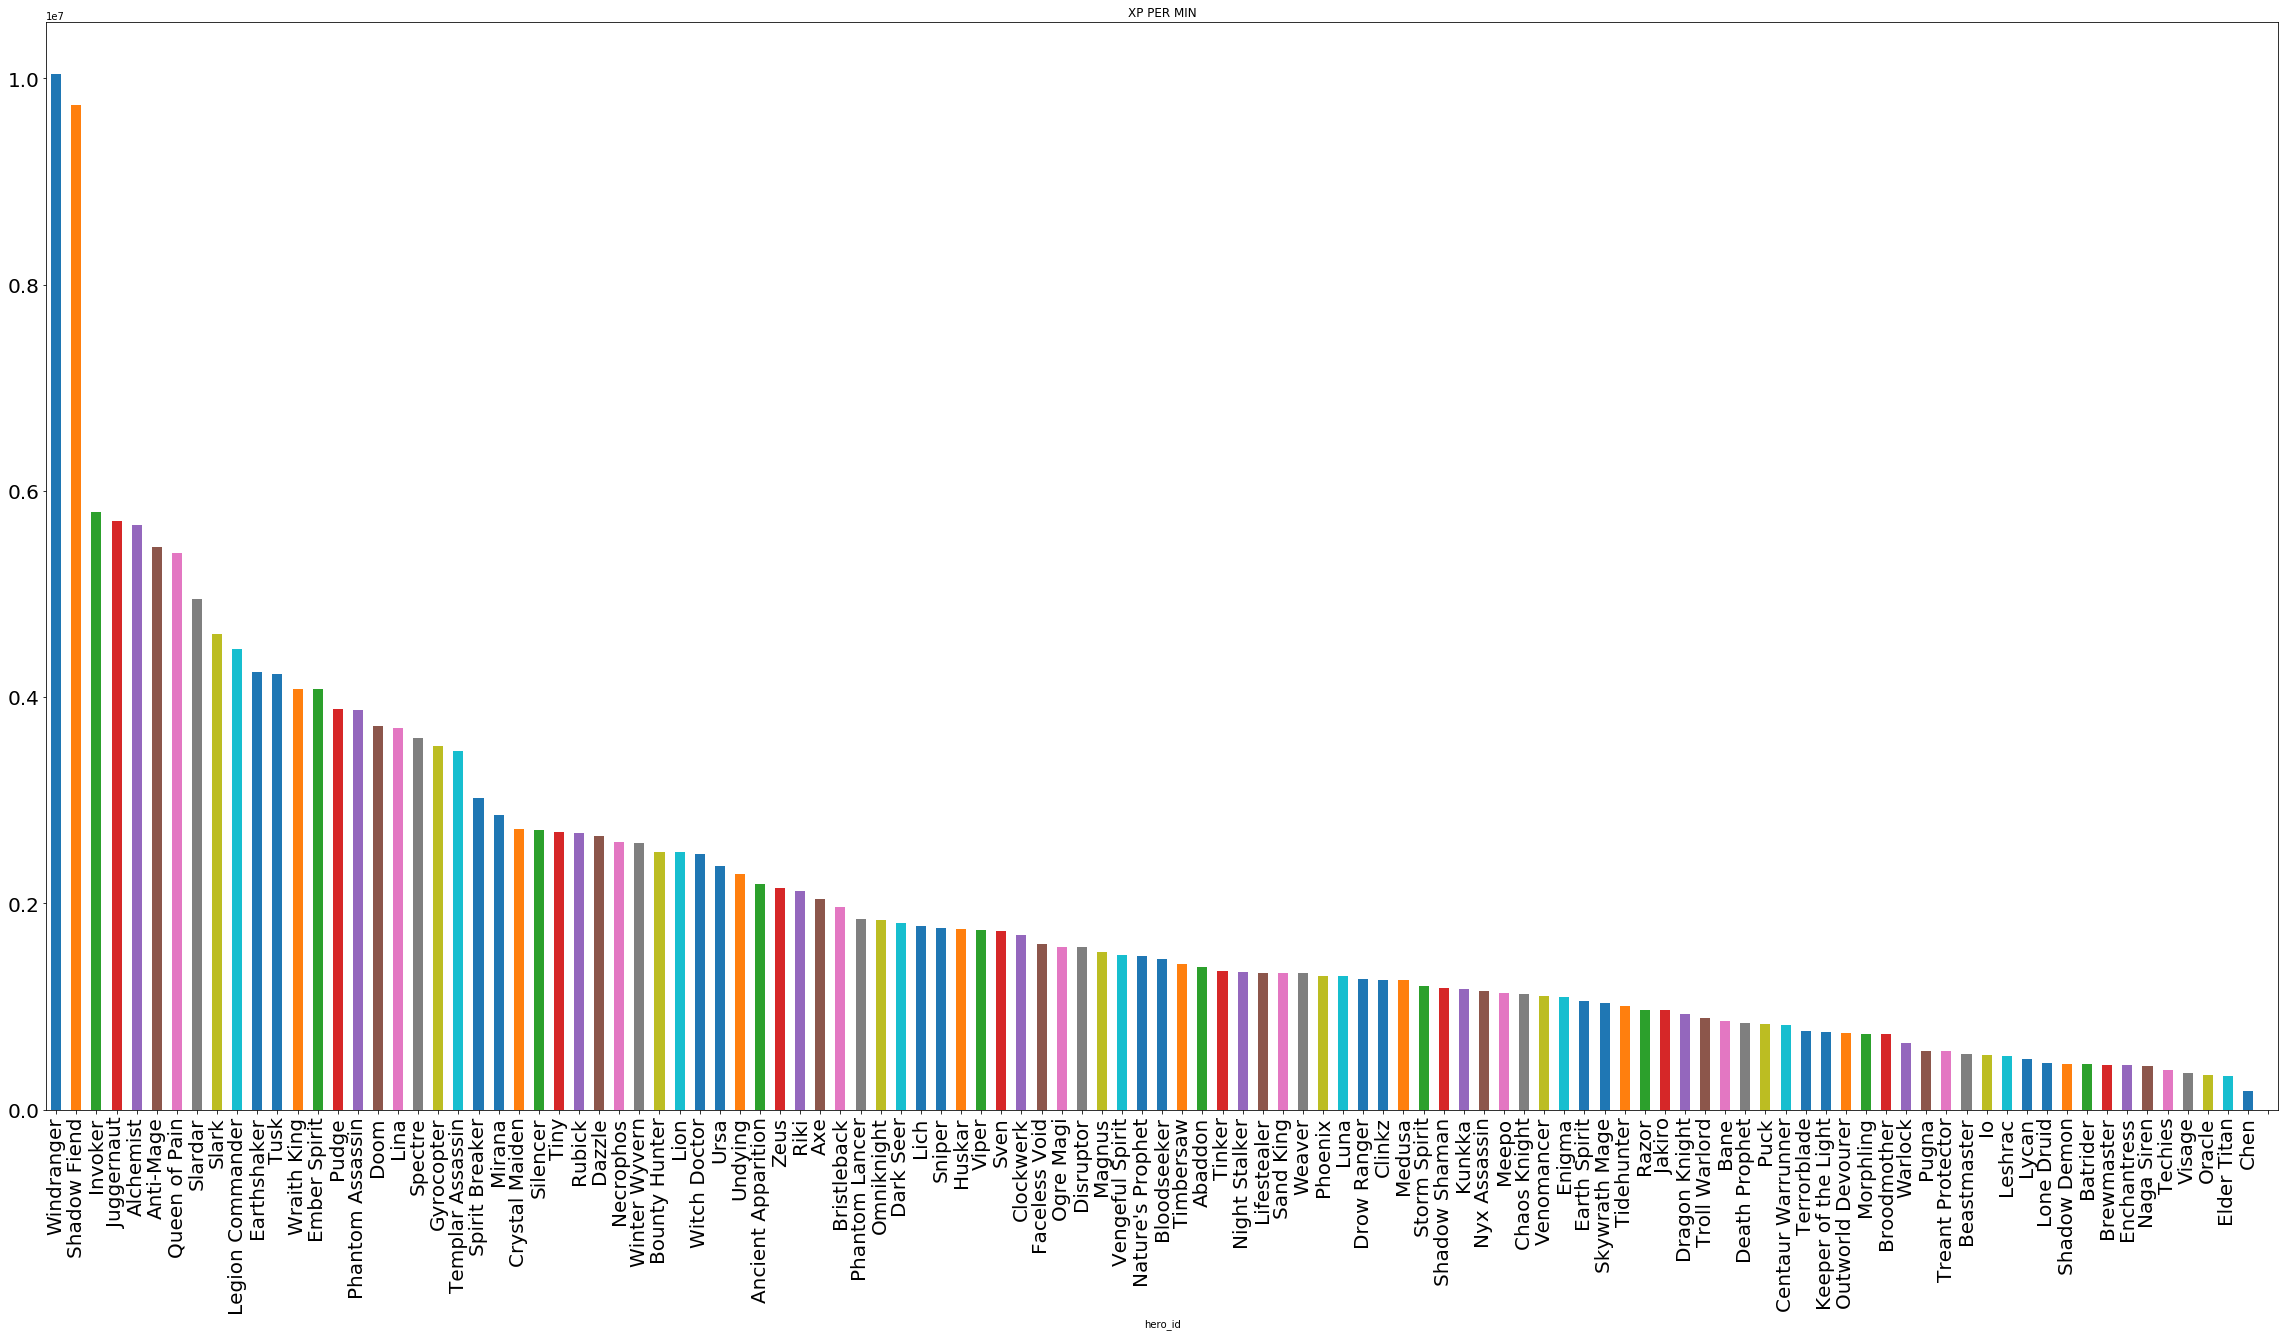

In [27]:
ax = df.groupby('hero_id')['xp_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False).plot(kind='bar',title="XP PER MIN",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['xp_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
ax = ax
fig = plt.gcf()
fig.savefig('xp_per_min.png', transparent=True)

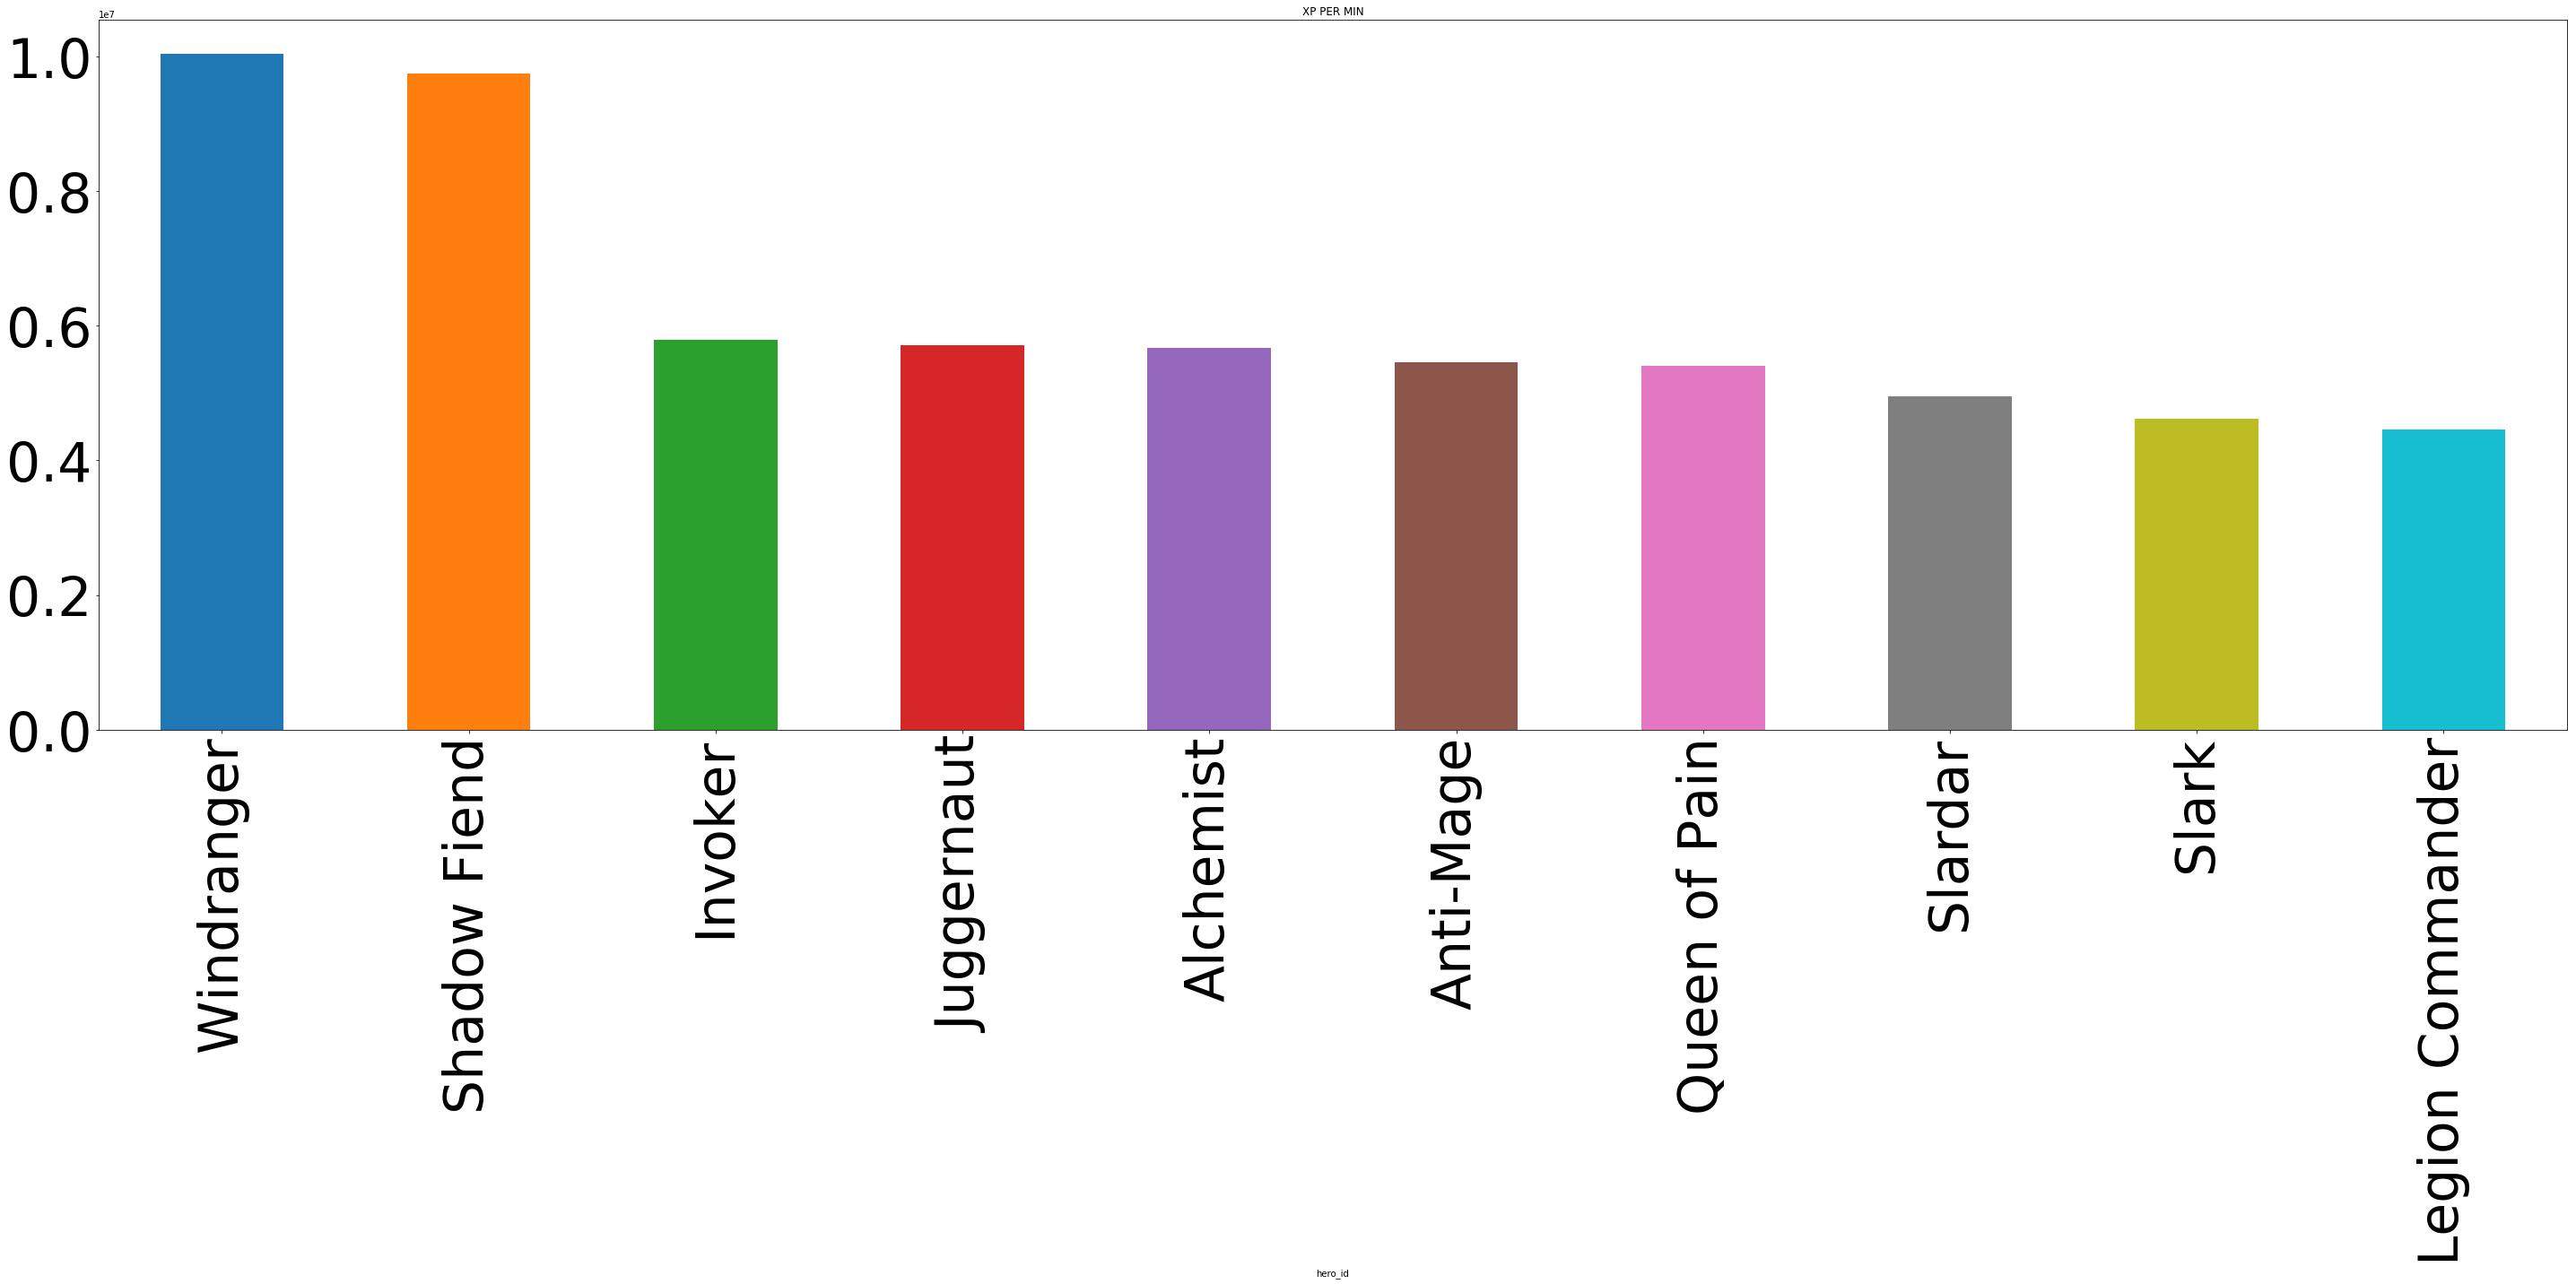

In [28]:
ax = df.groupby('hero_id')['xp_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="XP PER MIN",figsize=(40,20),fontsize=60)
hm = []
for i in df.groupby('hero_id')['xp_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('xp_per_min.png', transparent=True)

# GOLD PER MIN

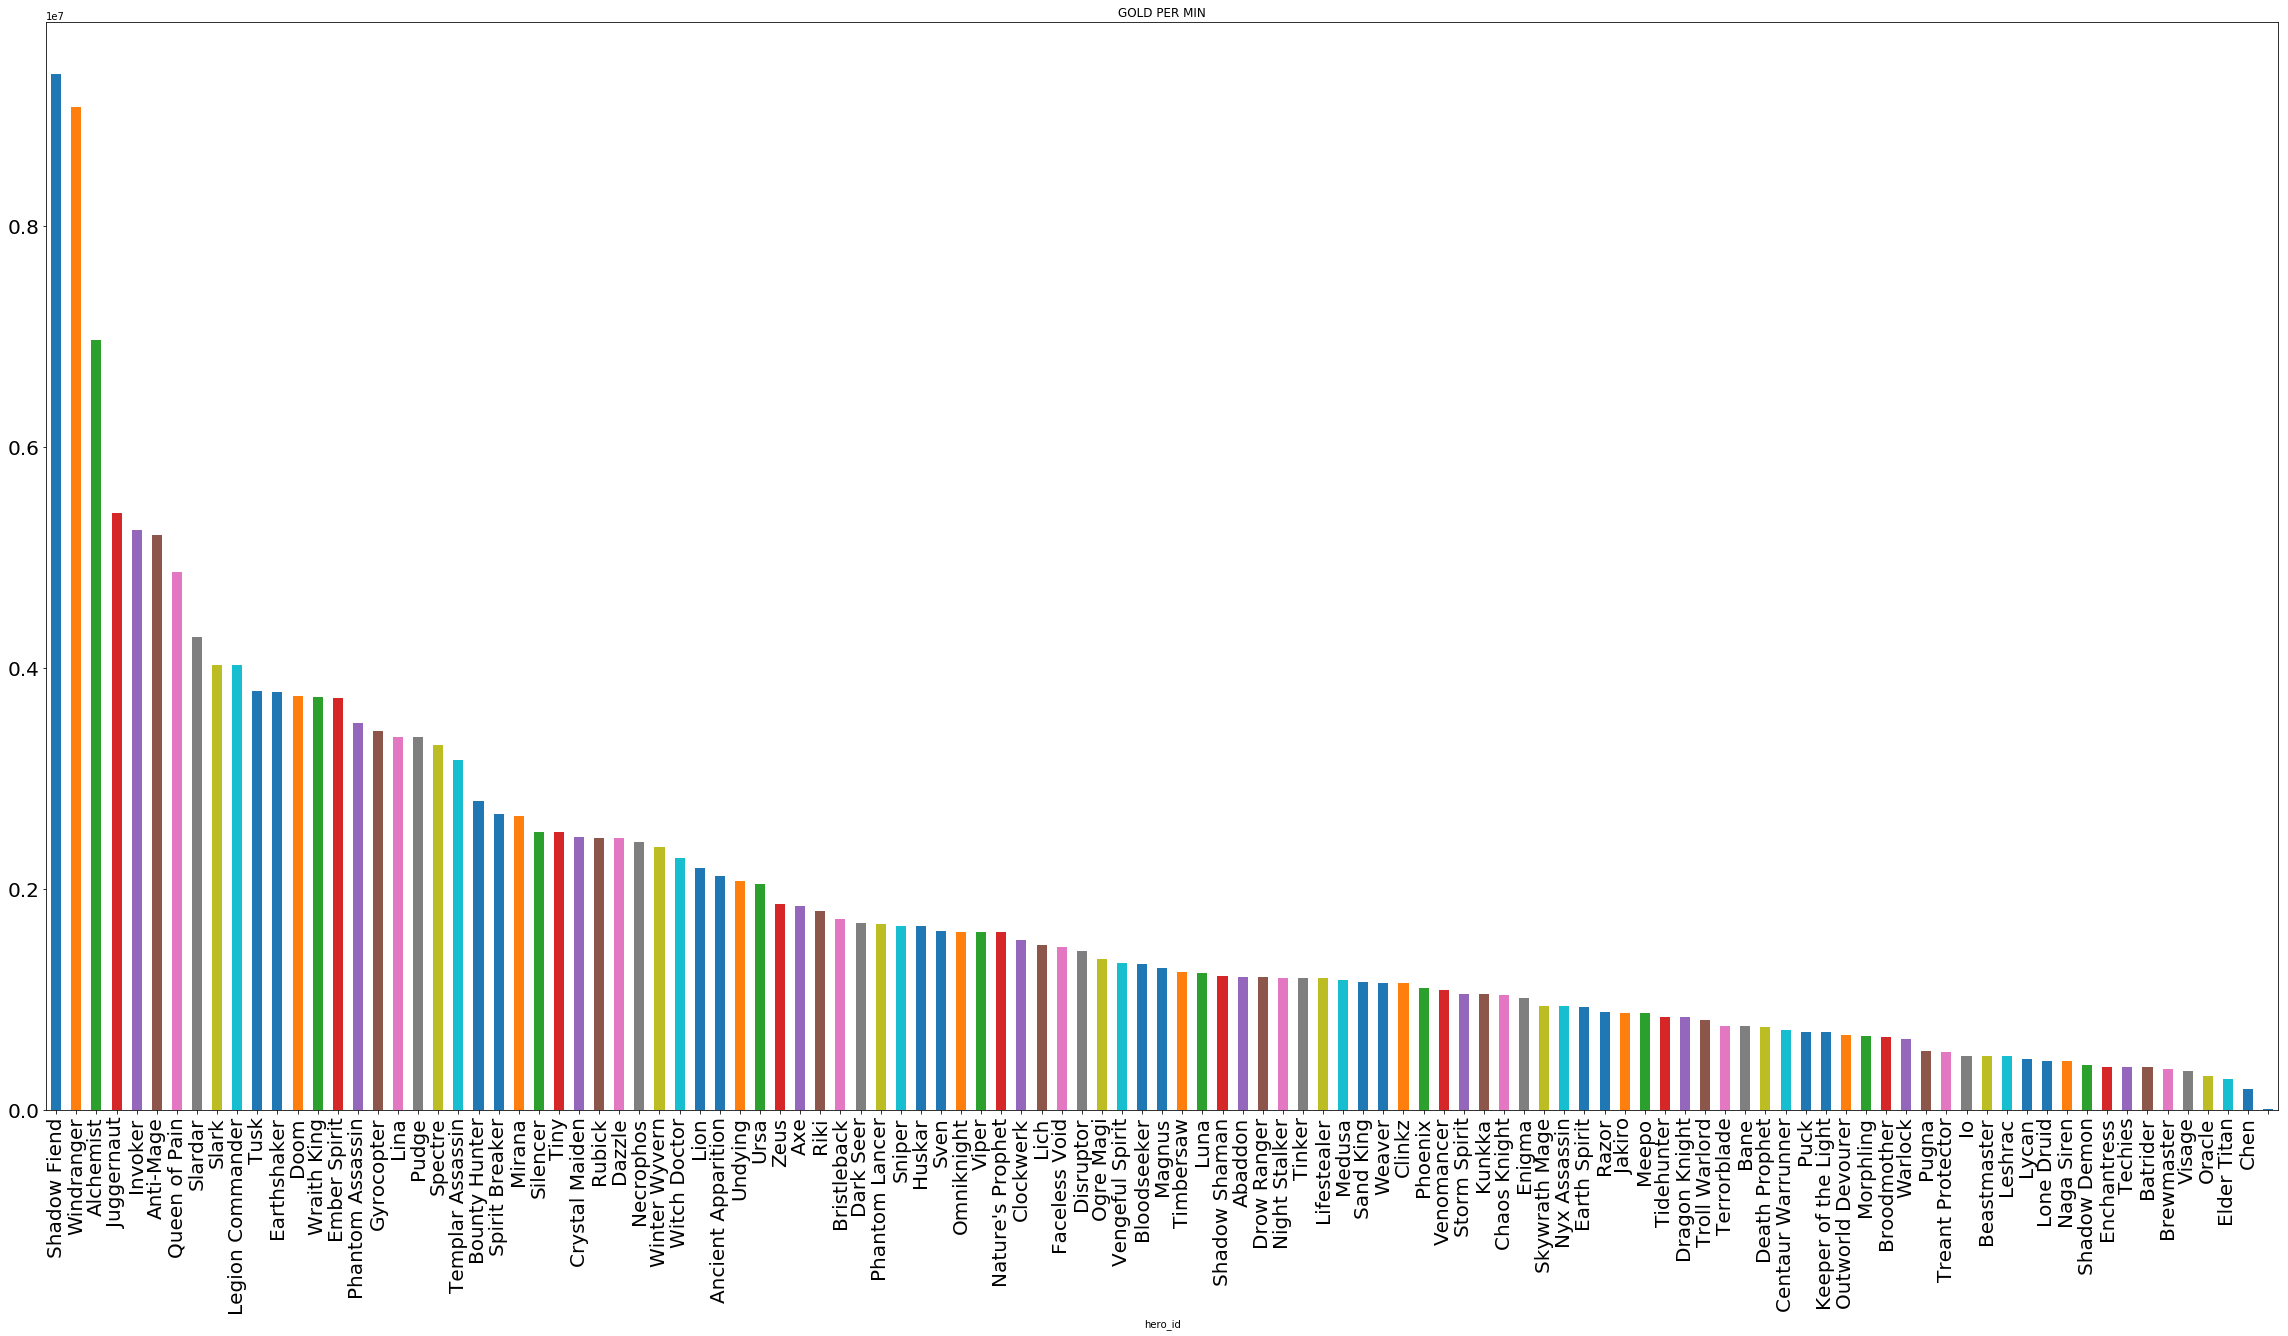

In [178]:
ax = df.groupby('hero_id')['gold_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False).plot(kind='bar',title="GOLD PER MIN",figsize=(40,20),fontsize=20)
hm = []
for i in df.groupby('hero_id')['gold_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
ax.set_xticklabels(hm)
ax = ax

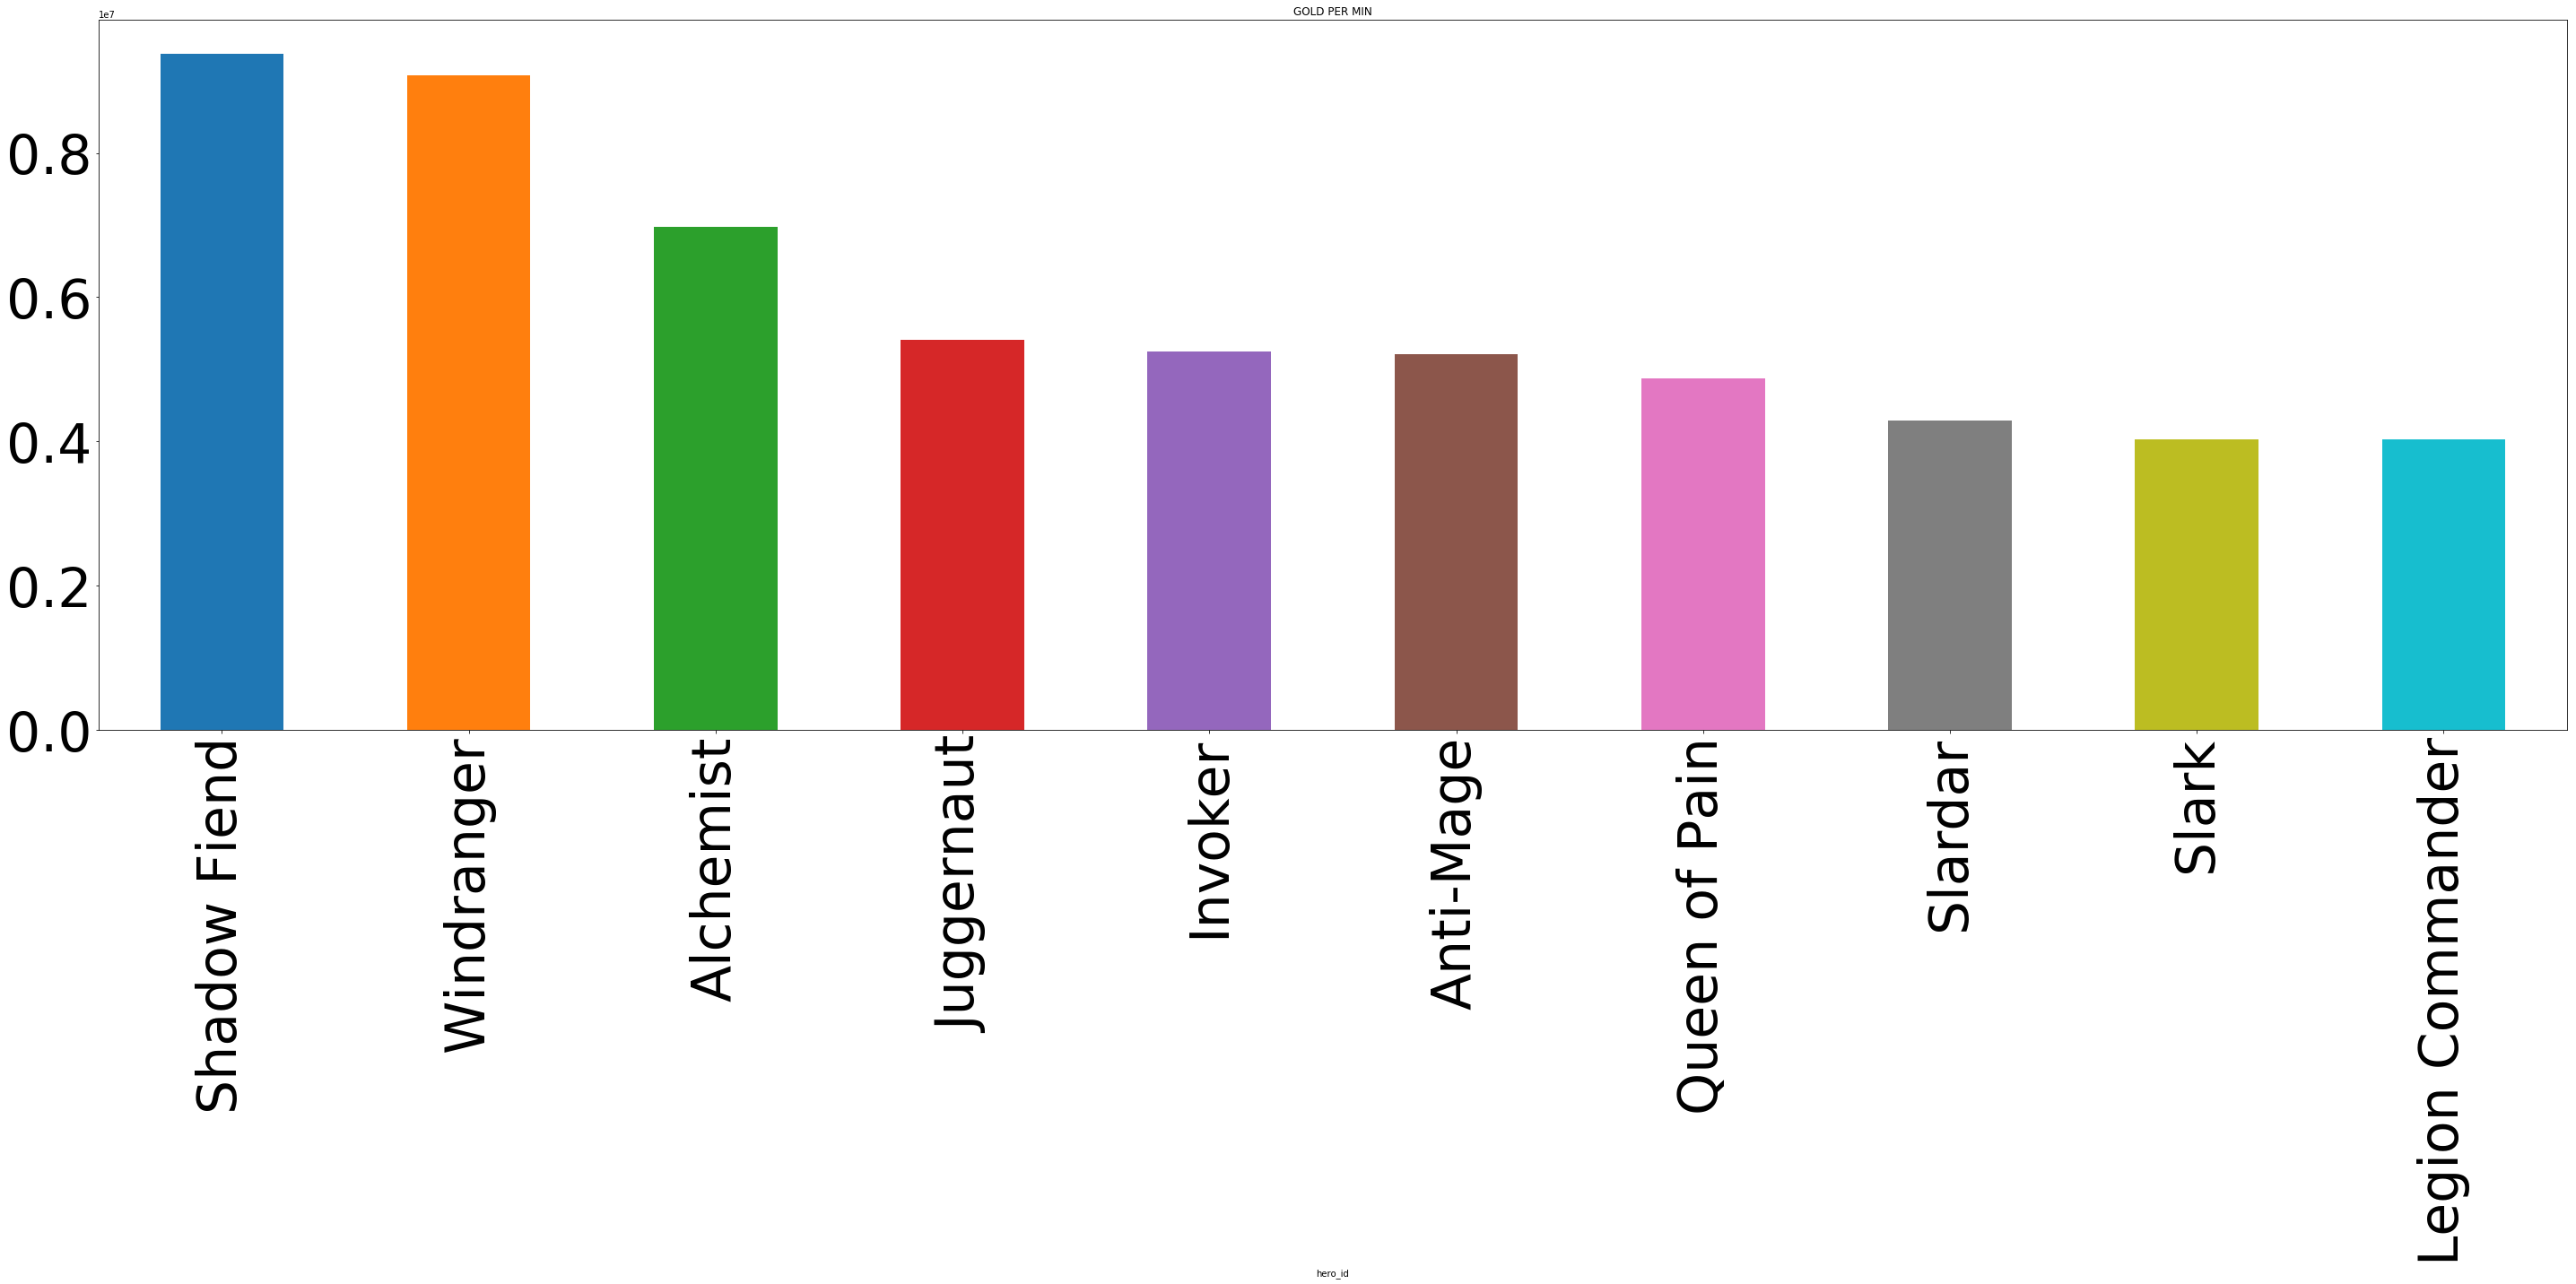

In [29]:
ax = df.groupby('hero_id')['gold_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False)
ax = ax[:10]
ax = ax.plot(kind='bar',title="GOLD PER MIN",figsize=(40,20),fontsize=60)
hm = []
for i in df.groupby('hero_id')['gold_per_min'].sum().sort_values(axis=0, ascending=False, inplace=False).keys():
    if i==0:
        continue
    hm.append(hero_names[hero_names.hero_id==i].localized_name[hero_names[hero_names.hero_id==i].localized_name.keys()[0]])
    if len(hm)==10:
        break
ax.set_xticklabels(hm)
ax = ax
ax.xaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.tight_layout()
ax = ax
fig = plt.gcf()
fig.savefig('gold_per_min.png', transparent=True)

In [205]:
'''
#%matplotlib notebook
#%matplotlib inline
a = df.groupby('hero_id')['gold_per_min'].sum()
b = {}
for i in a.keys():
    b[i] = a[i]
x = np.arange(len(b))

y = b.values()
 
plt.figure(figsize=(40,20))
plt.bar(x, y)
plt.xticks(x, b.keys(), rotation='vertical',fontsize=20)
#plt.yticks(np.arange(0, max(y)), step=1000000)
plt.suptitle('GOLD PER MIN', fontsize=20)
plt.xlabel('HEROES', fontsize=18)
plt.ylabel('GOLD PER MIN', fontsize=16)
#fig = plt.gcf()
#fig.savefig('test.png')
plt.show()'''

In [4]:
df

,A,B,C,D
aaa,0.348231,1.270387,0.522869,0.844659
bbb,0.800278,0.377564,0.812086,0.929431
ccc,1.706531,0.602296,0.195483,0.655897
ddd,0.076413,1.436419,0.885007,0.719800
eee,0.242600,0.524037,1.229740,0.648124


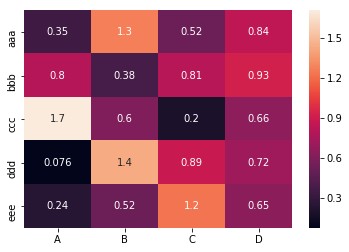

In [3]:
Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

In [6]:
k = dfW.keys()

In [7]:
k = list(map(int,k))

In [8]:
k.remove(0)

In [9]:
df = pd.DataFrame()

In [10]:
for i in k:
    df[i] = 0

In [11]:
df1 = df.copy()
df2 = df.copy()

In [12]:
c = []
for i in k:
    c = []
    for j in k:
        if i == j:
            c.append(0)
        else:
            if i < j:
                c.append(win_count_2_heroes[(i,j)]/(win_count_2_heroes[(i,j)]+loss_count_2_heroes[(i,j)]))
            else:
                c.append(win_count_2_heroes[(j,i)]/(win_count_2_heroes[(j,i)]+loss_count_2_heroes[(j,i)]))
    df1.loc[i] = c
    

In [106]:
c = []
for i in k:
    c = []
    for j in k:
        if i == j:
            c.append(0)
        else:
            if i < j:
                c.append(win_count_2_heroes[(i,j)]/(win_count_2_heroes[(i,j)]+loss_count_2_heroes[(i,j)]))
            else:
                c.append(0)
    df2.loc[i] = c
    

In [108]:
df1

,1,2,3,4,5,6,7,8,9,10,...,102,103,104,105,106,107,109,110,111,112
1,0.000000,0.405405,0.412955,0.395722,0.489796,0.481481,0.490700,0.435185,0.500000,0.358974,...,0.558621,0.521739,0.473118,0.460432,0.467822,0.481481,0.333333,0.505415,0.489130,0.500642
2,0.405405,0.000000,0.505051,0.435294,0.501618,0.560976,0.418129,0.458525,0.475207,0.389610,...,0.500000,0.480000,0.415842,0.333333,0.431095,0.448276,0.476190,0.494624,0.355556,0.433898
3,0.412955,0.505051,0.000000,0.480769,0.487179,0.409091,0.490909,0.532258,0.475728,0.444444,...,0.574468,0.363636,0.410811,0.214286,0.438095,0.400000,0.466667,0.578947,0.416667,0.395062
4,0.395722,0.435294,0.480769,0.000000,0.509259,0.402778,0.517730,0.457895,0.423529,0.386364,...,0.518987,0.176471,0.443580,0.206897,0.482143,0.463415,0.547619,0.610390,0.444444,0.474359
5,0.489796,0.501618,0.487179,0.509259,0.000000,0.525974,0.549320,0.567854,0.575309,0.480000,...,0.684211,0.562500,0.564541,0.449275,0.532860,0.566038,0.479675,0.563830,0.500000,0.489879
6,0.481481,0.560976,0.409091,0.402778,0.525974,0.000000,0.556364,0.555556,0.470588,0.484848,...,0.573034,0.444444,0.422460,0.441176,0.456522,0.441860,0.433333,0.542373,0.344828,0.608108
7,0.490700,0.418129,0.490909,0.517730,0.549320,0.556364,0.000000,0.535080,0.566558,0.481013,...,0.561265,0.507042,0.488432,0.493827,0.473923,0.558036,0.476190,0.522222,0.447761,0.479592
8,0.435185,0.458525,0.532258,0.457895,0.567854,0.555556,0.535080,0.000000,0.538922,0.363636,...,0.621622,0.588235,0.459877,0.486726,0.519149,0.567657,0.464789,0.515924,0.546392,0.546341
9,0.500000,0.475207,0.475728,0.423529,0.575309,0.470588,0.566558,0.538922,0.000000,0.555556,...,0.578313,0.473684,0.479478,0.490909,0.514085,0.478571,0.514563,0.589744,0.625000,0.528409
10,0.358974,0.389610,0.444444,0.386364,0.480000,0.484848,0.481013,0.363636,0.555556,0.000000,...,0.352941,0.400000,0.369748,0.666667,0.458333,0.404762,0.100000,0.437500,0.384615,0.550000


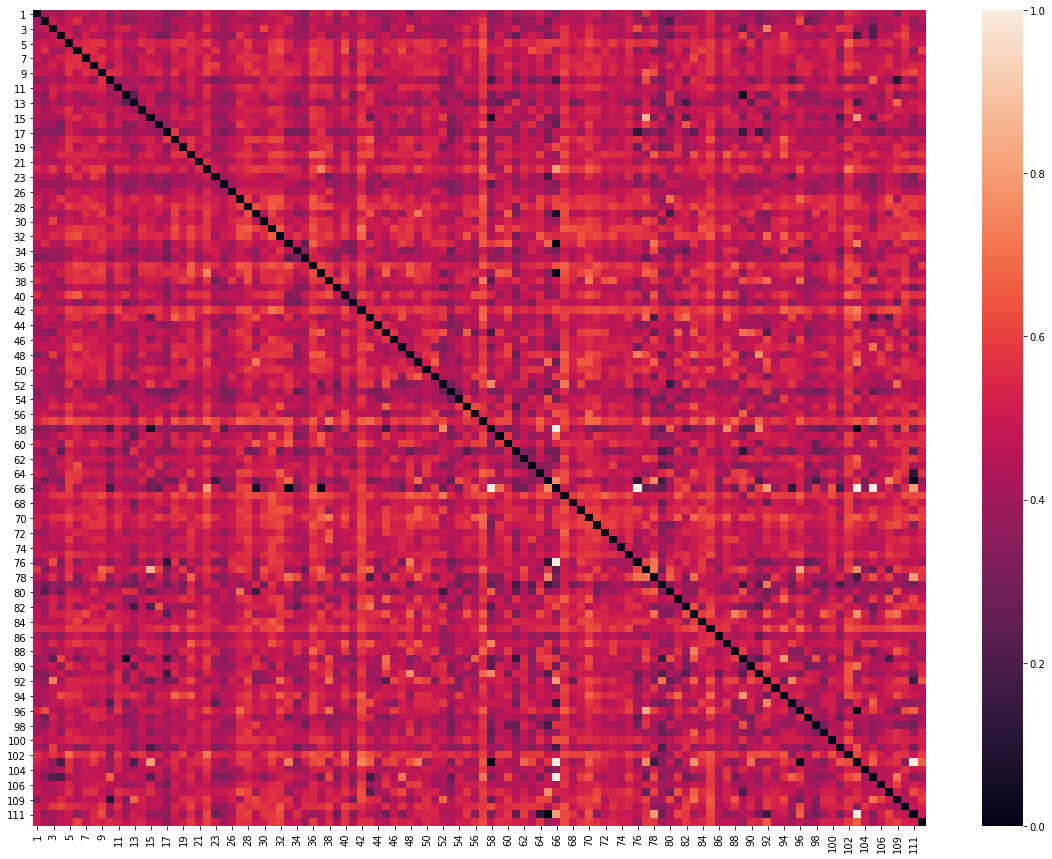

In [14]:
plt.subplots(figsize=(20,15))
sns.heatmap(df1)

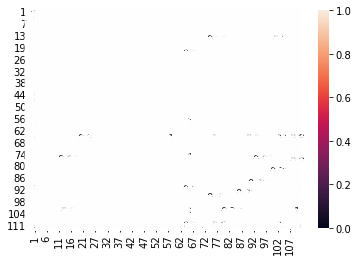

In [109]:
ax = sns.heatmap(df1, annot=True)

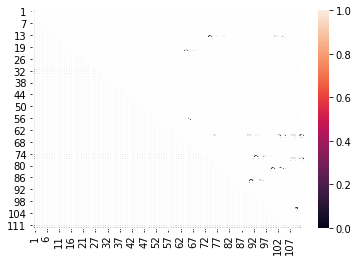

In [110]:
ax = sns.heatmap(df2, annot=True)

# ---------------------------------------------------EDA --------------------------------------------------

In [35]:
dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])][dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['1']==dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['3']][dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])][dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['1']==dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['3']]['112']==dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])][dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['1']==dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['3']]['3']]

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,109,110,111,112
14979,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])][dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['1']==dfW[(dfW['1']==1)][(dfW[(dfW['1']==1)]['1'] == dfW[(dfW['1']==1)]['2'])]['3']]

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,109,110,111,112
14979,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49112,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
win_count_4_heroes = {}
for i in dfW.keys():
    if int(i) == 0:
        continue
    t = dfW[(dfW[i]==1)]
    for j in dfW.keys():
        if int(j) == 0:
            continue
        if i==j:
            continue
        tt = t[(t[i] == t[j])]
        for k in dfW.keys():
            if int(k) == 0:
                continue
            if j == k or i == k:
                continue
            ttt = tt[(tt[j] == tt[k])]
            for l in dfW.keys():
                if int(l) == 0:
                    continue
                if i == l or j == l or k == l:
                    continue
                    
                m = [int(i),int(j),int(k),int(l)]
                m.sort()
                if tuple(m) in win_count_4_heroes:
                    continue
                win_count_4_heroes[tuple(m)] = len(ttt[(ttt[k] == ttt[l])])

In [40]:
len(win_count_4_heroes)

NameError: name 'win_count_4_heroes' is not defined

In [ ]:
df = pd.DataFrame(list(win_count_4_heroes.items()), columns=['Team', 'Win'])

In [ ]:
df

In [ ]:
'''df.to_csv('win_count_4_heroes.csv',index = None)'''

In [39]:
win_count_3_heroes = {}
for i in dfW.keys():
    if int(i) == 0:
        continue
    t = dfW[(dfW[i]==1)]
    for j in dfW.keys():
        if int(j) == 0:
            continue
        if i == j:
            continue
        tt = t[(t[i] == t[j])]
        for k in dfW.keys():
            if int(k) == 0:
                continue
            if j == k or i == k:
                continue
            
            l = [int(i),int(j),int(k)]
            l.sort()
            if tuple(l) in win_count_3_heroes:
                continue
            win_count_3_heroes[tuple(l)] = len(tt[(tt[j] == tt[k])])

In [36]:
len(win_count_3_heroes)

221815

In [37]:
df = pd.DataFrame(list(win_count_3_heroes.items()), columns=['Team', 'Win'])

In [38]:
df

,Team,Win
0,"(0, 1, 2)",0
1,"(0, 1, 3)",0
2,"(0, 1, 4)",0
3,"(0, 1, 5)",0
4,"(0, 1, 6)",0
5,"(0, 1, 7)",0
6,"(0, 1, 8)",0
7,"(0, 1, 9)",0
8,"(0, 1, 10)",0
9,"(0, 1, 11)",0


In [ ]:
'''df.to_csv('win_count_3_heroes.csv',index = None)'''

In [6]:
dfWtr = dfW
dfLtr = dfL

In [7]:
dicW = {}
for i in list(dfWtr):
    dicW[int(i)] = dfWtr[i].sum()

In [8]:
dicL = {}
for i in list(dfLtr):
    dicL[int(i)] = dfLtr[i].sum()

In [9]:
'''a = []
b = []
for i in dfWtr.index.tolist():
    b = dfWtr.loc[i].iloc[dfWtr.loc[i].nonzero()[0]].index.tolist()
    b = set(list(map(int, b)))
    a.append(b)'''

In [10]:
'''win_list = a'''

In [11]:
dfWtr.sum().sum()

250000

In [12]:
import numpy as np

In [13]:
prior_probabilty_win = len(dfWtr)/(len(dfWtr)+len(dfLtr))
prior_probabilty_loss = len(dfLtr)/(len(dfWtr)+len(dfLtr))

In [14]:
dfWtr.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '102', '103', '104', '105', '106', '107', '109', '110', '111', '112'],
      dtype='object', length=111)

In [15]:
log_prior_probabilty_win = np.log(prior_probabilty_win)
log_prior_probabilty_loss = np.log(prior_probabilty_loss)


logLikelihoodsW = 0;
logLikelihoodsL = 0;

sdicW = {}
sdicL = {}
sum = 0
for i in dicW:
    sdicW[i] = (dicW[i]+1)/(dfWtr.sum().sum()+2)
    logLikelihoodsW += np.log(sdicW[i])
    sdicL[i] = (dicL[i]+1)/(dfLtr.sum().sum()+2)
    logLikelihoodsL += np.log(sdicL[i])
    
print("")
print("Log Prior for Win : P(W) = ",log_prior_probabilty_win)
print("Log Prior for Loss : P(L) = ",log_prior_probabilty_loss)
print("")
print("Log Likelihoods for Win : P(H|W) = ",logLikelihoodsW)
print("Log Likelihoods for Loss : P(H|L) = ",logLikelihoodsL)
print("")


Log Prior for Win : P(W) =  -0.6931471805599453
Log Prior for Loss : P(L) =  -0.6931471805599453

Log Likelihoods for Win : P(H|W) =  -559.6026343553644
Log Likelihoods for Loss : P(H|L) =  -554.5575663791406



In [16]:
log_sdicW = {}
log_sdicL = {}
for i in sdicW:
    log_sdicW[i] = np.log(sdicW[i])
    log_sdicL[i] = np.log(sdicL[i])

# This function returns all the combination of heroes giving their win and loss probabilities

In [17]:
df1 = pd.read_csv("test_labels.csv")
df2 = pd.read_csv("test_player.csv")

In [126]:
df2

,match_id,account_id,hero_id,player_slot
0,50000,117784,96,0
1,50000,158361,84,1
2,50000,158362,46,2
3,50000,137970,85,3
4,50000,1090,39,4
5,50000,2391,9,128
6,50000,2393,75,129
7,50000,2394,106,130
8,50000,36737,74,131
9,50000,2392,62,132


In [18]:
true_label = []
for i in df1['radiant_win'].tolist():
    true_label.append(i)
    if i == 1:
        true_label.append(0)
    else:
        true_label.append(1)

In [19]:
'''true_label = df1['radiant_win'].tolist()'''

"true_label = df1['radiant_win'].tolist()"

In [20]:
len(true_label)

200000

In [21]:
a = []
b = []
for i in df2['hero_id'].tolist():
    b.append(i)
    if len(b) == 5:
        a.append(b)
        b = []

In [22]:
len(a)

200000

In [23]:
df = pd.DataFrame(a)
#df = df.transpose()
df.columns = ['h1', 'h2', 'h3', 'h4', 'h5']

In [24]:
df['Win'] = true_label

In [25]:
df = df[df['Win'] == 1]

In [26]:
c

NameError: name 'c' is not defined

In [59]:
a

[11, 52]

In [60]:
t = df[ (df['h1'] == a[0]) | (df['h2'] == a[0]) | (df['h3'] == a[0]) | (df['h4'] == a[0]) | (df['h5'] == a[0]) ]

In [62]:
tt = t[ (t['h1'] == a[1]) | (t['h2'] == a[1]) | (t['h3'] == a[1]) | (t['h4'] == a[1]) | (t['h5'] == a[1]) ]

In [64]:
len(tt)

110

In [74]:
def get_team_win_probabilities_new(a,o,true_label):
    for i in range(0,len(a)):
        tpW = 0
        tpL = 0
        for j in a[i]:
            if j in log_sdicW:
                tpW += log_sdicW[j]
                tpL += log_sdicL[j]
        tpW += log_prior_probabilty_win
        tpL += log_prior_probabilty_loss
        if tpW > tpL:
            o.append(1)
        else:
            o.append(0)

In [75]:
o = []
get_team_win_probabilities_new(a,o,true_label)

In [79]:
len(true_label)

200000

In [80]:
len(o)

200000

In [81]:
metrics = computeMetrics(o,true_label)

print("Accuracy = ",metrics[0])
print("Precision = ",metrics[1])
print("Recall = ",metrics[2])

print("True Positive = ",metrics[3])
print("True Negative = ",metrics[4])
print("False Positive = ",metrics[5])
print("False Negative = ",metrics[6])


Accuracy =  0.568765
Precision =  0.5695896372008298
Recall =  0.56284
True Positive =  56284
True Negative =  57469
False Positive =  42531
False Negative =  43716


In [29]:
def get_team_win_probabilities(a,o,q):
    t = []
    for i in dicW.keys():
        if i in a:
            continue
        for j in dicW.keys():
            if (j in a) or (i == j):
                continue
            for k in dicW.keys():
                if (k in a) or (j == k) or (i == k):
                    continue
                t = a[:]
                t.append(i)
                t.append(j)
                t.append(k)
                t.sort()
                if (tuple(t) in o) or (tuple(t) in q):
                    continue
                tpW = 0
                tpL = 0
                for r in t:
                    if r in log_sdicW:
                        tpW += log_sdicW[r]
                        tpL += log_sdicL[r]
                tpW += log_prior_probabilty_win
                tpL += log_prior_probabilty_loss
                if tpW > tpL:
                    o[tuple(t)] = tpW
                else:
                    q[tuple(t)] = tpL

# Funtion to get top 10 teams

In [30]:
def recommend_heroes(a):
    o = {} # dict which contains all the possible combination of heroes for which win prob is higher than the loss prob.
    q = {} # dict which contains all the possible combination of heroes for which loss prob is higher than the win prob.
    get_team_win_probabilities(a,o,q)
    so = sorted(o.items(), key=operator.itemgetter(1),reverse=True) #gives a sorted dict for easy
    team = []
    recommended_teams = []
    for i in range(0,10):
        team = []
        for j in a:
            team.append(hero_names[hero_names.hero_id==j].localized_name[hero_names[hero_names.hero_id==j].localized_name.keys()[0]])
        for j in so[i][0]:
            if j in a:
                continue
            team.append(hero_names[hero_names.hero_id==j].localized_name[hero_names[hero_names.hero_id==j].localized_name.keys()[0]])
        recommended_teams.append(team)
        recommended_teams.append(so[i][1])
    return recommended_teams

In [82]:
c

[[11, 51, 67, 83, 86]]

In [133]:
o

{(1, 3, 11, 22, 51): -22.78161677423719,
 (1, 3, 11, 28, 51): -21.883544368028232,
 (1, 3, 11, 31, 51): -22.7514637360665,
 (1, 3, 11, 36, 51): -22.503497548850415,
 (1, 3, 11, 42, 51): -22.208634781517965,
 (1, 3, 11, 51, 57): -22.60211184394099,
 (1, 3, 11, 51, 67): -22.35928786007702,
 (1, 3, 11, 51, 70): -22.82288038902027,
 (1, 3, 11, 51, 85): -22.497276228236164,
 (1, 3, 11, 51, 102): -23.08405926227209,
 (1, 4, 11, 42, 51): -22.098547300969408,
 (1, 4, 11, 51, 57): -22.49202436339243,
 (1, 4, 11, 51, 67): -22.249200379528464,
 (1, 5, 6, 11, 51): -22.168444446086035,
 (1, 5, 7, 11, 51): -20.717482923151042,
 (1, 5, 8, 11, 51): -20.7786010011997,
 (1, 5, 9, 11, 51): -21.13530258303617,
 (1, 5, 11, 14, 51): -20.920612348337976,
 (1, 5, 11, 18, 51): -21.89451671199553,
 (1, 5, 11, 20, 51): -21.655674605750093,
 (1, 5, 11, 22, 51): -21.52281578349057,
 (1, 5, 11, 27, 51): -21.815744457694194,
 (1, 5, 11, 28, 51): -20.62474337728161,
 (1, 5, 11, 29, 51): -22.292610082722913,
 (1, 5, 1

In [193]:
c

[[11, 51, 67, 83, 86]]

In [114]:
a = [67,51]

In [115]:
o = {} # dict which contains all the possible combination of heroes for which win prob is higher than the loss prob.
q = {} # dict which contains all the possible combination of heroes for which loss prob is higher than the win prob.
get_team_win_probabilities(a,o,q)

In [116]:
so = sorted(o.items(), key=operator.itemgetter(1),reverse=True)

In [117]:
so[0][1]

-19.875849402347445

In [118]:
ss = {}

In [119]:
ss = {}
for i in range(0,100):
    ss[so[i][0]] = so[i][1]

In [120]:
ss

{(11, 21, 28, 51, 67): -19.875849402347445,
 (11, 21, 51, 67, 74): -19.96281717880514,
 (7, 11, 21, 51, 67): -19.968588948216873,
 (8, 11, 21, 51, 67): -20.02970702626553,
 (11, 21, 51, 67, 100): -20.047200183713045,
 (11, 21, 51, 67, 73): -20.080774627996455,
 (11, 21, 39, 51, 67): -20.152139114204427,
 (11, 14, 21, 51, 67): -20.171718373403802,
 (11, 21, 42, 51, 67): -20.200939815837177,
 (11, 21, 50, 51, 67): -20.21835096995635,
 (1, 11, 21, 51, 67): -20.238824842527773,
 (11, 21, 51, 67, 104): -20.24968572340683,
 (5, 11, 21, 51, 67): -20.265611118527158,
 (11, 21, 51, 67, 69): -20.268921596840187,
 (11, 21, 51, 67, 93): -20.301174693364914,
 (21, 28, 51, 67, 74): -20.302595580439853,
 (7, 21, 28, 51, 67): -20.308367349851583,
 (11, 21, 51, 67, 71): -20.32870278004076,
 (11, 21, 51, 67, 112): -20.33450282151789,
 (8, 21, 28, 51, 67): -20.36948542790024,
 (11, 21, 51, 67, 75): -20.37449267206083,
 (9, 11, 21, 51, 67): -20.386408608102,
 (11, 21, 30, 51, 67): -20.386408608102,
 (21, 

In [34]:
a = [list(i[0]) for i in so]

In [166]:
a = a[:10]

In [35]:
for i in range(0,len(a)):
    a[i].sort()

In [36]:
a

[[11, 21, 28, 51, 74],
 [7, 11, 21, 28, 51],
 [8, 11, 21, 28, 51],
 [11, 21, 28, 51, 100],
 [11, 21, 28, 51, 73],
 [7, 8, 11, 21, 51],
 [7, 11, 21, 51, 100],
 [11, 21, 51, 73, 74],
 [11, 14, 21, 28, 51],
 [7, 11, 21, 51, 73],
 [11, 21, 28, 42, 51],
 [8, 11, 21, 51, 100],
 [11, 21, 28, 50, 51],
 [8, 11, 21, 51, 73],
 [1, 11, 21, 28, 51],
 [11, 21, 28, 51, 104],
 [11, 21, 51, 73, 100],
 [5, 11, 21, 28, 51],
 [11, 21, 28, 51, 69],
 [11, 21, 42, 51, 74],
 [7, 11, 21, 42, 51],
 [11, 21, 28, 51, 93],
 [11, 21, 50, 51, 74],
 [7, 11, 21, 50, 51],
 [11, 21, 28, 51, 71],
 [11, 21, 28, 51, 112],
 [11, 21, 28, 51, 67],
 [5, 11, 21, 51, 74],
 [8, 11, 21, 42, 51],
 [11, 21, 51, 69, 74],
 [5, 7, 11, 21, 51],
 [7, 11, 21, 51, 69],
 [8, 11, 21, 50, 51],
 [11, 21, 42, 51, 100],
 [11, 21, 28, 51, 75],
 [11, 14, 21, 51, 73],
 [9, 11, 21, 28, 51],
 [11, 21, 28, 30, 51],
 [11, 21, 50, 51, 100],
 [11, 21, 28, 51, 86],
 [11, 21, 42, 51, 73],
 [11, 21, 51, 71, 74],
 [5, 8, 11, 21, 51],
 [7, 11, 21, 51, 71],
 [

In [134]:
x = [11, 21, 51, 67, 74]

In [37]:
len(aa)

NameError: name 'aa' is not defined

In [135]:
x.sort()

In [137]:
set(x) in aa

False

In [38]:
ttt = df.copy() 

In [56]:
aa = ttt.values.tolist()

In [57]:
len(aa)

100000

In [55]:
ttt = ttt.drop(columns=['Win'])

In [110]:
for i in range(0,len(aa)):
    aa[i].sort()

In [111]:
len(aa)

100000

In [123]:
cnt = 0
for i in aa:
    if tuple(i) in o:
        cnt += 1

In [124]:
cnt

267

In [141]:
len(aa)

100000

In [157]:
x = {}
for z in range(0,50):
    #print(z,aa[z])
    a = [aa[z][randint(0,4)],aa[z][randint(0,4)]]
    o = {}
    q = {}
    get_team_win_probabilities(a,o,q)
    so = sorted(o.items(), key=operator.itemgetter(1),reverse=True)
    ss = {}
    for j in range(0,50):
        ss[so[j][0]] = so[j][1]
    cnt = 0
    for j in aa:
        if tuple(j) in ss:
            cnt += 1
    x[tuple(aa[z])] = cnt

In [158]:
so = sorted(x.items(), key=operator.itemgetter(1),reverse=True)

In [159]:
so

[((11, 50, 88, 93, 100), 10),
 ((14, 50, 59, 75, 94), 9),
 ((4, 21, 30, 33, 42), 9),
 ((21, 44, 62, 73, 104), 8),
 ((9, 62, 74, 75, 106), 7),
 ((11, 41, 55, 82, 85), 7),
 ((11, 28, 33, 73, 112), 7),
 ((26, 60, 73, 74, 112), 7),
 ((11, 32, 36, 42, 86), 6),
 ((25, 28, 30, 32, 36), 6),
 ((2, 11, 31, 40, 67), 5),
 ((3, 5, 8, 42, 92), 4),
 ((21, 39, 71, 72, 100), 4),
 ((1, 37, 69, 87, 97), 4),
 ((2, 26, 37, 73, 102), 4),
 ((7, 71, 74, 85, 106), 4),
 ((8, 25, 26, 69, 79), 3),
 ((2, 3, 30, 41, 73), 3),
 ((5, 14, 35, 93, 104), 3),
 ((9, 11, 47, 97, 110), 3),
 ((1, 29, 39, 54, 75), 3),
 ((16, 36, 39, 46, 71), 2),
 ((11, 33, 39, 67, 102), 2),
 ((6, 21, 46, 68, 71), 2),
 ((25, 28, 44, 100, 101), 1),
 ((19, 28, 70, 72, 91), 1),
 ((1, 16, 36, 74, 107), 1),
 ((2, 10, 44, 57, 106), 0),
 ((15, 44, 56, 94, 110), 0),
 ((2, 21, 50, 65, 106), 0),
 ((9, 21, 30, 65, 73), 0),
 ((16, 19, 55, 63, 79), 0),
 ((28, 35, 46, 77, 111), 0),
 ((25, 28, 43, 62, 72), 0),
 ((59, 98, 99, 100, 104), 0),
 ((6, 14, 20, 46, 7

In [86]:
#a = [win_count_2_heroes_sorted[0][0][0],win_count_2_heroes_sorted[0][0][1]] #list of heroes already selected
recommended_teams = recommend_heroes(a)

In [87]:
recommended_teams

[['Shadow Fiend', 'Clockwerk', 'Windranger', 'Slardar', 'Invoker'],
 -19.48707368675635,
 ['Shadow Fiend', 'Clockwerk', 'Earthshaker', 'Windranger', 'Slardar'],
 -19.492845456168084,
 ['Shadow Fiend', 'Clockwerk', 'Juggernaut', 'Windranger', 'Slardar'],
 -19.553963534216738,
 ['Shadow Fiend', 'Clockwerk', 'Windranger', 'Slardar', 'Tusk'],
 -19.571456691664256,
 ['Shadow Fiend', 'Clockwerk', 'Windranger', 'Slardar', 'Alchemist'],
 -19.605031135947666,
 ['Shadow Fiend', 'Clockwerk', 'Earthshaker', 'Juggernaut', 'Windranger'],
 -19.64670308008617,
 ['Shadow Fiend', 'Clockwerk', 'Earthshaker', 'Windranger', 'Tusk'],
 -19.664196237533684,
 ['Shadow Fiend', 'Clockwerk', 'Windranger', 'Alchemist', 'Invoker'],
 -19.69199891240536,
 ['Shadow Fiend', 'Clockwerk', 'Pudge', 'Windranger', 'Slardar'],
 -19.695974881355017,
 ['Shadow Fiend', 'Clockwerk', 'Earthshaker', 'Windranger', 'Alchemist'],
 -19.697770681817094]

# Metrics

In [21]:
dfWts.loc[45006].iloc[dfWts.loc[45006].nonzero()[0]].index.tolist()

['7', '25', '42', '100', '106']

In [22]:
a = []
b = []
for i in dfWts.index.tolist():
    b = dfWts.loc[i].iloc[dfWts.loc[i].nonzero()[0]].index.tolist()
    b = list(map(int, b))
    a.append(b)

In [23]:
label = [True]*5000

In [127]:
from random import randint
    

In [25]:
a

[[42, 52, 57, 67, 91],
 [3, 9, 67, 99, 100],
 [39, 42, 64, 86, 97],
 [12, 30, 36, 39, 41],
 [6, 18, 21, 57, 62],
 [21, 36, 47, 57, 67],
 [7, 25, 42, 100, 106],
 [14, 63, 68, 70, 106],
 [9, 36, 69, 74, 101],
 [20, 25, 48, 51, 92],
 [11, 42, 64, 78, 112],
 [6, 14, 39, 51, 71],
 [7, 9, 39, 55, 109],
 [21, 62, 86, 99, 106],
 [28, 31, 43, 67, 100],
 [11, 26, 48, 55, 68],
 [41, 44, 45, 50, 100],
 [11, 30, 42, 47, 87],
 [21, 60, 67, 68, 87],
 [31, 40, 71, 73, 100],
 [22, 34, 62, 87, 109],
 [14, 39, 55, 62, 73],
 [8, 46, 56, 63, 101],
 [30, 34, 67, 68, 100],
 [25, 36, 59, 71, 73],
 [7, 21, 25, 42, 46],
 [18, 20, 42, 100, 110],
 [3, 7, 9, 55, 74],
 [21, 30, 36, 39, 93],
 [5, 11, 23, 63, 71],
 [30, 54, 67, 71, 81],
 [1, 11, 42, 44, 49],
 [1, 8, 11, 50, 71],
 [19, 29, 50, 57, 74],
 [9, 57, 69, 74, 93],
 [12, 27, 69, 80, 111],
 [8, 50, 58, 63, 102],
 [21, 39, 40, 74, 100],
 [11, 50, 59, 91, 102],
 [3, 5, 14, 75, 95],
 [11, 30, 73, 82, 86],
 [46, 62, 73, 82, 112],
 [27, 39, 72, 74, 85],
 [6, 9, 33,

In [195]:
test_label = []
for i in [[42, 52, 57, 67, 91]]:
    for j in range(0,len(i)):
        for k in range(j+1,len(i)):
            #print(i,j,k)
            h = []
            h.append(i[j])
            h.append(i[k])
            o = {}
            q = {}
            get_team_win_probabilities(h,o,q)
            flag = False
            so = sorted(o.items(), key=operator.itemgetter(1),reverse=True)
            for l in range(0,10):
                print(h,tuple(i),so[l])
                if tuple(i) == so[l][0]:
                    test_label.append(True)
                    flag = True
                    break
                else:
                    continue
            if not flag:
                test_label.append(False)

[42, 52] (42, 52, 57, 67, 91) ((11, 21, 28, 42, 52), -21.022528651972237)
[42, 52] (42, 52, 57, 67, 91) ((7, 11, 21, 42, 52), -21.102957236555827)
[42, 52] (42, 52, 57, 67, 91) ((11, 21, 42, 52, 74), -21.107599411236595)
[42, 52] (42, 52, 57, 67, 91) ((8, 11, 21, 42, 52), -21.175374390633237)
[42, 52] (42, 52, 57, 67, 91) ((11, 21, 42, 52, 100), -21.196339519098284)
[42, 52] (42, 52, 57, 67, 91) ((11, 21, 42, 52, 73), -21.230606420966183)
[42, 52] (42, 52, 57, 67, 91) ((11, 14, 21, 42, 52), -21.312111865681043)
[42, 52] (42, 52, 57, 67, 91) ((11, 21, 42, 50, 52), -21.371147004487447)
[42, 52] (42, 52, 57, 67, 91) ((11, 21, 42, 52, 104), -21.387428208695287)
[42, 52] (42, 52, 57, 67, 91) ((5, 11, 21, 42, 52), -21.405283515503193)
[42, 57] (42, 52, 57, 67, 91) ((11, 21, 28, 42, 57), -19.351331172644706)
[42, 57] (42, 52, 57, 67, 91) ((7, 11, 21, 42, 57), -19.431759757228296)
[42, 57] (42, 52, 57, 67, 91) ((11, 21, 42, 57, 74), -19.436401931909064)
[42, 57] (42, 52, 57, 67, 91) ((8, 11, 2

In [196]:
test_label

[False, False, False, False, False, False, False, False, False, False]

In [164]:
so = sorted(o.items(), key=operator.itemgetter(1),reverse=True)

In [165]:
set((42, 52, 57, 67, 91))

{42, 52, 57, 67, 91}

In [166]:
len(so)

199587

In [167]:
so[0][0]

(11, 21, 28, 42, 67)

In [168]:
c = [set(i[0]) for i in so]

In [169]:
x = c.index(set((42, 52, 57, 67, 91)))

In [170]:
x

164388

In [171]:
so[x]

((42, 52, 57, 67, 91), -25.110335761593493)

In [173]:
so[0][1] - so[x][1]

6.007168263290161

In [101]:
so[len(so)-1]

((42, 58, 66, 67, 103), -28.454755509915994)

In [98]:
set((42, 52, 57, 67, 91)) in [set(i[0]) for i in so]

True

In [99]:
(42, 52, 57, 67, 91) in [i[0] for i in so]

True

In [61]:
def computeMetrics(label_Yts,Yts):
    confusion_matrix = []
    TP = 0
    TN = 0
    FP = 0 
    FN = 0

    for i in range(0,len(label_Yts)):
        if(Yts[i]==1):
            if(label_Yts[i]==Yts[i]):
                TP += 1
            else:
                FN += 1
        else:
            if(label_Yts[i]==Yts[i]):
                TN += 1
            else:
                FP += 1
    accuracy = (TP+TN) / (TP+TN+FP+FN)
    precision = (TP) / (TP+FP)
    recall = (TP) / (TP+FN)
    return (accuracy,precision,recall,TP,TN,FP,FN)

metrics = computeMetrics(test_label,label)

print("Accuracy = ",metrics[0])
print("Precision = ",metrics[1])
print("Recall = ",metrics[2])

NameError: name 'test_label' is not defined

In [134]:
def get_team_win_probabilities_test(a,o,q):
    t = []
    for i in dicW.keys():
        if i in a:
            continue
        t = a[:]
        t.append(i)
        t.sort()
        if (tuple(t) in o) or (tuple(t) in q):
            continue
        tpW = 0
        tpL = 0
        for r in t:
            if r in log_sdicW:
                tpW += log_sdicW[r]
                tpL += log_sdicL[r]
        tpW += log_prior_probabilty_win
        tpL += log_prior_probabilty_loss
        if tpW > tpL:
            o[tuple(t)] = tpW
        else:
            q[tuple(t)] = tpL

In [182]:
o = {}
q = {}
a = [91, 52, 57, 42]
get_team_win_probabilities_test(a,o,q)

In [183]:
so = sorted(o.items(), key=operator.itemgetter(1),reverse=True)

In [184]:
len(so)

101

In [185]:
(42, 52, 57, 67, 91) in [i[0] for i in so]

True

In [186]:
c = [i[0] for i in so]

In [187]:
x = c.index((42, 52, 57, 67, 91))

In [188]:
x

17

In [189]:
so[x]

((42, 52, 57, 67, 91), -25.110335761593493)

In [190]:
so[0][1] - so[x][1]

0.9457037961934738

In [240]:
win_list

[[11, 51, 67, 83, 86],
 [5, 22, 67, 73, 106],
 [7, 10, 12, 38, 85],
 [19, 31, 40, 47, 78],
 [8, 39, 55, 69, 87],
 [27, 32, 67, 71, 106],
 [8, 20, 67, 69, 100],
 [14, 44, 53, 74, 96],
 [18, 39, 46, 71, 93],
 [14, 26, 36, 48, 74],
 [29, 35, 44, 50, 69],
 [40, 46, 75, 96, 104],
 [1, 7, 18, 21, 105],
 [25, 32, 63, 81, 100],
 [1, 7, 28, 44, 75],
 [14, 21, 22, 44, 47],
 [5, 68, 73, 74, 98],
 [25, 46, 62, 71, 72],
 [9, 61, 73, 93, 100],
 [7, 19, 36, 76, 91],
 [7, 21, 59, 71, 95],
 [1, 50, 84, 102, 106],
 [7, 9, 21, 32, 93],
 [1, 47, 62, 68, 100],
 [7, 26, 75, 98, 109],
 [21, 23, 43, 104, 109],
 [11, 32, 36, 46, 70],
 [62, 69, 75, 93, 106],
 [1, 46, 71, 86, 102],
 [28, 35, 69, 74, 90],
 [4, 5, 42, 46, 53],
 [11, 22, 36, 71, 100],
 [34, 50, 60, 67, 99],
 [18, 21, 26, 50, 74],
 [8, 50, 74, 109, 112],
 [11, 14, 26, 32, 93],
 [11, 20, 42, 84, 99],
 [7, 39, 81, 86, 89],
 [12, 14, 30, 45, 100],
 [44, 46, 51, 57, 71],
 [35, 61, 67, 87, 110],
 [4, 11, 30, 42, 104],
 [18, 25, 51, 62, 84],
 [26, 41, 68,

In [210]:
set([1, 2, 3]).issubset([1, 2,3,4])

True

In [241]:
c = [[11, 51, 67, 83, 86]]

In [26]:
a = [11,51]
cnt = 0
o = {}
for i in dfW.keys():
    if int(i) in a:
        continue
    t = a[:]
    t.append(int(i))
    t.sort()
    for j in win_list:
        if(set(t).issubset(j)):
            if tuple(t) not in o:
                o[tuple(t)] = 1
            else:
                o[tuple(t)] += 1

In [27]:
so = sorted(o.items(), key=operator.itemgetter(1),reverse=True)

In [28]:
d = [i[0] for i in so]

In [29]:
so

[((11, 51, 67), 39),
 ((7, 11, 51), 36),
 ((11, 51, 86), 35),
 ((11, 51, 112), 34),
 ((11, 30, 51), 33),
 ((11, 51, 93), 33),
 ((8, 11, 51), 32),
 ((5, 11, 51), 31),
 ((11, 26, 51), 30),
 ((11, 51, 75), 30),
 ((11, 42, 51), 29),
 ((11, 51, 68), 28),
 ((1, 11, 51), 27),
 ((11, 44, 51), 27),
 ((11, 50, 51), 25),
 ((11, 51, 100), 25),
 ((11, 51, 104), 25),
 ((11, 51, 62), 23),
 ((9, 11, 51), 22),
 ((11, 28, 51), 22),
 ((11, 51, 72), 22),
 ((11, 51, 71), 18),
 ((11, 51, 87), 17),
 ((11, 51, 101), 17),
 ((11, 51, 57), 16),
 ((11, 31, 51), 15),
 ((11, 20, 51), 14),
 ((11, 51, 74), 14),
 ((11, 21, 51), 13),
 ((11, 14, 51), 12),
 ((11, 51, 73), 12),
 ((11, 12, 51), 11),
 ((11, 25, 51), 11),
 ((11, 51, 69), 11),
 ((11, 51, 70), 11),
 ((11, 51, 84), 11),
 ((11, 51, 102), 11),
 ((11, 51, 106), 11),
 ((11, 18, 51), 10),
 ((11, 27, 51), 10),
 ((11, 40, 51), 10),
 ((11, 51, 53), 10),
 ((11, 16, 51), 9),
 ((11, 19, 51), 9),
 ((11, 51, 81), 9),
 ((11, 51, 85), 9),
 ((11, 51, 90), 9),
 ((3, 11, 51), 8)

In [30]:
oo = {}
for i in range(0,10):
    cnt = 0
    o = {}
    for j in dfW.keys():
        if int(j) in d[i]:
            continue
        t = list(d[i])
        t.append(int(j))
        t.sort()
        for k in win_list:
            if(set(t).issubset(k)):
                if tuple(t) not in o:
                    o[tuple(t)] = 1
                else:
                    o[tuple(t)] += 1
        oo[d[i]] = o

In [31]:
oo

{(11, 51, 67): {(5, 11, 51, 67): 1,
  (7, 11, 51, 67): 4,
  (9, 11, 51, 67): 2,
  (11, 14, 51, 67): 2,
  (11, 16, 51, 67): 1,
  (11, 20, 51, 67): 2,
  (11, 21, 51, 67): 1,
  (11, 22, 51, 67): 1,
  (11, 25, 51, 67): 5,
  (11, 26, 51, 67): 1,
  (11, 30, 51, 67): 3,
  (11, 33, 51, 67): 3,
  (11, 50, 51, 67): 4,
  (11, 51, 57, 67): 1,
  (11, 51, 62, 67): 4,
  (11, 51, 67, 68): 1,
  (11, 51, 67, 70): 1,
  (11, 51, 67, 71): 3,
  (11, 51, 67, 74): 2,
  (11, 51, 67, 75): 5,
  (11, 51, 67, 83): 1,
  (11, 51, 67, 84): 1,
  (11, 51, 67, 85): 1,
  (11, 51, 67, 86): 3,
  (11, 51, 67, 87): 3,
  (11, 51, 67, 88): 1,
  (11, 51, 67, 91): 1,
  (11, 51, 67, 95): 1,
  (11, 51, 67, 100): 5,
  (11, 51, 67, 101): 2,
  (11, 51, 67, 103): 1,
  (11, 51, 67, 104): 1,
  (11, 51, 67, 107): 2,
  (11, 51, 67, 109): 1,
  (11, 51, 67, 111): 1,
  (11, 51, 67, 112): 6},
 (7, 11, 51): {(1, 7, 11, 51): 2,
  (3, 7, 11, 51): 1,
  (4, 7, 11, 51): 2,
  (7, 8, 11, 51): 5,
  (7, 9, 11, 51): 3,
  (7, 11, 14, 51): 1,
  (7, 11, 16

In [32]:
ooo = {}
cnt = 0
for i in oo:
    cnt += 1
    if cnt > 1:
        break
    si = sorted(oo[i].items(), key=operator.itemgetter(1),reverse=True)
    u = 0
    while (u < 10) or (u < len(si)):
        si[u][0]
        o = {}
        for j in dfW.keys():
            if int(j) in si[u][0]:
                continue
            t = list(si[u][0])
            t.append(int(j))
            t.sort()
            for k in win_list:
                if(set(t).issubset(k)):
                    if tuple(t) not in o:
                        o[tuple(t)] = 1
                    else:
                        o[tuple(t)] += 1
            ooo[si[u][0]] = o
        u += 1

In [35]:
ooo

{(11, 51, 67, 112): {(5, 11, 51, 67, 112): 1,
  (11, 33, 51, 67, 112): 2,
  (11, 50, 51, 67, 112): 1,
  (11, 51, 67, 100, 112): 1,
  (11, 51, 67, 107, 112): 1},
 (11, 25, 51, 67): {(9, 11, 25, 51, 67): 1,
  (11, 20, 25, 51, 67): 1,
  (11, 25, 33, 51, 67): 1,
  (11, 25, 51, 67, 75): 1,
  (11, 25, 51, 67, 104): 1},
 (11, 51, 67, 75): {(11, 16, 51, 67, 75): 1,
  (11, 25, 51, 67, 75): 1,
  (11, 51, 67, 75, 86): 1,
  (11, 51, 67, 75, 88): 1,
  (11, 51, 67, 75, 95): 1},
 (11, 51, 67, 100): {(11, 50, 51, 67, 100): 2,
  (11, 51, 67, 71, 100): 1,
  (11, 51, 67, 100, 107): 1,
  (11, 51, 67, 100, 112): 1},
 (7, 11, 51, 67): {(7, 11, 20, 51, 67): 1,
  (7, 11, 51, 67, 87): 1,
  (7, 11, 51, 67, 101): 2},
 (11, 50, 51, 67): {(11, 50, 51, 67, 87): 1,
  (11, 50, 51, 67, 100): 2,
  (11, 50, 51, 67, 112): 1},
 (11, 51, 62, 67): {(11, 26, 51, 62, 67): 1,
  (11, 30, 51, 62, 67): 1,
  (11, 51, 62, 67, 74): 1,
  (11, 51, 62, 67, 84): 1},
 (11, 30, 51, 67): {(11, 30, 51, 62, 67): 1,
  (11, 30, 51, 67, 70): 1,

In [7]:
df3 = pd.read_csv('win_count_3_heroes.csv')

In [22]:
a = df4.iloc[0]['Team']

In [21]:
df4['Team'] = df4['Team'].apply(eval)

In [23]:
a

(1, 2, 3, 4)

In [ ]:
t = dfW[(dfW[i]==1)]

In [ ]:
'''df4 = pd.read_csv('win_count_4_heroes.csv')
df4[['h1', 'h2', 'h3', 'h4']] = df4['Team'].apply(pd.Series)
df4.to_csv('win_count_4_heroes.csv',index = None)'''

In [28]:
df4

,Team,Win
0,"(1, 2, 3, 4)",0
1,"(1, 2, 3, 5)",0
2,"(1, 2, 3, 6)",0
3,"(1, 2, 3, 7)",0
4,"(1, 2, 3, 8)",0
5,"(1, 2, 3, 9)",0
6,"(1, 2, 3, 10)",0
7,"(1, 2, 3, 11)",0
8,"(1, 2, 3, 12)",0
9,"(1, 2, 3, 13)",0


In [56]:
c = [[11, 51, 67, 83, 86]]

In [57]:
a = [11,52]

In [33]:
t = df3[(df3['h1'] == a[0])| (df3['h2'] == a[0]) | (df3['h3'] == a[0])]

In [35]:
tt = t[(t['h1'] == a[1])| (t['h2'] == a[1]) | (t['h3'] == a[1])]

In [36]:
tt.sort_values("Win", inplace=True, ascending=False)

c:\users\amsbo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
tt

,Team,Win,h1,h2,h3
57241,"(11, 52, 93)",8,11,52,93
975,"(1, 11, 52)",7,1,11,52
56565,"(11, 42, 52)",7,11,42,52
55508,"(11, 28, 52)",7,11,28,52
44259,"(9, 11, 52)",5,9,11,52
57252,"(11, 52, 104)",4,11,52,104
57247,"(11, 52, 99)",4,11,52,99
57235,"(11, 52, 87)",4,11,52,87
55830,"(11, 32, 52)",4,11,32,52
54906,"(11, 20, 52)",4,11,20,52
